<a href="https://colab.research.google.com/github/cristian2023-lab/PROYECTO-DATA-SCIENCE-UTN-2024/blob/main/TP1/PROYECTO_DATA_SCIENCE_UTN_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TRABAJO INTEGRADOR FINAL DATA SCIENCE / 2024 / VELAZQUEZ CRISTIAN**


Introducción:

El diagnóstico preciso y oportuno de enfermedades es crucial para brindar una atención médica adecuada y mejorar los resultados de salud de los pacientes. Sin embargo, el proceso de diagnóstico tradicional a menudo puede ser lento, costoso y subjetivo, lo que lleva a retrasos en el tratamiento y resultados subóptimos.

Objetivo:

El objetivo de este proyecto es desarrollar un modelo de aprendizaje automático robusto que pueda predecir eficientemente la enfermedad de un individuo en base a los síntomas que presenta. Este modelo podría utilizarse para:

Apoyar a los médicos en el diagnóstico: Brindar a los médicos una herramienta de diagnóstico rápida y precisa que pueda complementar su juicio clínico y ayudar a identificar posibles enfermedades en una etapa temprana.
Permitir la autoevaluación de los pacientes: Facilitar que los pacientes evalúen sus propios síntomas y obtengan una predicción inicial de su posible enfermedad, motivándolos a buscar atención médica oportuna.
Optimizar la asignación de recursos médicos: Ayudar a los sistemas de salud a asignar recursos de manera más eficiente, priorizando la atención a los pacientes con mayor riesgo de enfermedades graves.
*texto en cursiva*

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
### MOSTRANDO EL DATAFRAME
df = pd.read_csv("/content/drive/MyDrive/CURSO DATA SCIENCE UTN/Tema_ Salud/Pacientes y fallecimientoss/Training.csv")

# EDA (Análisis exploratorio de datos)


In [ ]:
### MUESTRA LAS PRIMERAS COLUMNAS DEL DATAFRAME
df.head(10)

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   
5        0          1                     1                    0          0   
6        1          0                     1                    0          0   
7        1          1                     0                    0          0   
8        1          1                     1                    0          0   
9        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  scurring  \
0       0           0             0        0                 0  ...         0   
1       0           0             0        0                 0  ...         0   
2       0           0             0        0                 0  ...         0   
3       0           0             0        0                 0  ...         0   
4       0           0             0        0                 0  ...         0   
5       0           0             0        0                 0  ...         0   
6       0           0             0        0                 0  ...         0   
7       0           0             0        0                 0  ...         0   
8       0           0             0        0                 0  ...         0   
9       0           0             0        0                 0  ...         0   

   skin_peeling  silver_like_dusting  small_dents_in_nails  \
0             0                    0                     0   
1             0                    0                     0   
2             0                    0                     0   
3             0                    0                     0   
4             0                    0                     0   
5             0                    0                     0   
6             0                    0                     0   
7             0                    0                     0   
8             0                    0                     0   
9             0                    0                     0   

   inflammatory_nails  blister  red_sore_around_nose  yellow_crust_ooze  \
0                   0        0                     0                  0   
1                   0        0                     0                  0   
2                   0        0                     0                  0   
3                   0        0                     0                  0   
4                   0        0                     0                  0   
5                   0        0                     0                  0   
6                   0        0                     0                  0   
7                   0        0                     0                  0   
8                   0        0                     0                  0   
9                   0        0                     0                  0   

          prognosis  Unnamed: 133  
0  Fungal infection           NaN  
1  Fungal infection           NaN  
2  Fungal infection           NaN  
3  Fungal infection           NaN  
4  Fungal infection           NaN  
5  Fungal infection           NaN  
6  Fungal infection           NaN  
7  Fungal infection           NaN  
8  Fungal infection           NaN  
9  Fungal infection           NaN  

[10 rows x 134 columns]

In [ ]:
### MUESTRA DATAFRAME COMPLETO
print(df)

      itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4915        0          0                     0                    0   
4916        0          1                     0                    0   
4917        0          0                     0                    0   
4918        0          1                     0                    0   
4919        0          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           0             0        0         

In [ ]:
df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis',
       'Unnamed: 133'],
      dtype='object', length=134)

In [ ]:
### ¿HAY DATOS NULOS EN LOS DATOS?
df.info

<bound method DataFrame.info of       itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4915        0          0                     0                    0   
4916        0          1                     0                    0   
4917        0          0                     0                    0   
4918        0          1                     0                    0   
4919        0          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           0             0        0                 0   
1             0       0           0             0        0                 0   
2             0       0           0             0        0                 0   
3             0       0           0             0        0                 0   
4             0       0           0             0        0                 0   
...         ...     ...         ...           ...      ...               ...   
4915          0       0           0             0        0                 0   
4916          0       0           0             0        0                 0   
4917          0       0           0             0        0                 0   
4918          0       0           1             0        0                 0   
4919          0       0           0             0        0                 0   

      ...  scurring  skin_peeling  silver_like_dusting  small_dents_in_nails  \
0     ...         0             0                    0                     0   
1     ...         0             0                    0                     0   
2     ...         0             0                    0                     0   
3     ...         0             0                    0                     0   
4     ...         0             0                    0                     0   
...   ...       ...           ...                  ...                   ...   
4915  ...         0             0                    0                     0   
4916  ...         1             0                    0                     0   
4917  ...         0             0                    0                     0   
4918  ...         0             1                    1                     1   
4919  ...         0             0                    0                     0   

      inflammatory_nails  blister  red_sore_around_nose  yellow_crust_ooze  \
0                      0        0                     0                  0   
1                      0        0                     0                  0   
2                      0        0                     0                  0   
3                      0        0                     0                  0   
4                      0        0                     0                  0   
...                  ...      ...                   ...                ...   
4915                   0        0                     0                  0   
4916                   0        0                     0                  0   
4917                   0        0                     0                  0   
4918                   1        0                     0                  0   
4919                   0        1                     1                  1   

                                    prognosis  Unnamed: 133  
0                            Fungal infection           NaN  
1                            Fungal infection           NaN  
2                            Fungal infection           NaN  
3       

In [ ]:
### ¿QUÉ COLUMNAS TIENEN LOS DATOS?
df.shape

(4920, 134)

In [ ]:
### ¿CÓMO SE DISTRIBUYEN LAS VARIABLES NUMÉRICAS?

df.describe()

### LA COLUMNA UNNAMED: 133 TIENE 0 ENTRADAS, LO QUE SUGIERE QUE ESTÁ VACÍA Y PUEDE SER ELIMINADA.
### LA MEDIA DE CADA SÍNTOMA INDICA LA FRECUENCIA PROMEDIO CON LA QUE APARECE CADA SÍNTOMA EN EL DATASET.
### POR EJEMPLO, ITCHING TIENE UNA MEDIA DE 0.137805, LO QUE SUGIERE QUE ESTE SÍNTOMA ESTÁ PRESENTE EN APROXIMADAMENTE EL 13.78% DE LOS CASOS.

itching    skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  4920.000000  4920.000000           4920.000000          4920.000000   
mean      0.137805     0.159756              0.021951             0.045122   
std       0.344730     0.366417              0.146539             0.207593   
min       0.000000     0.000000              0.000000             0.000000   
25%       0.000000     0.000000              0.000000             0.000000   
50%       0.000000     0.000000              0.000000             0.000000   
75%       0.000000     0.000000              0.000000             0.000000   
max       1.000000     1.000000              1.000000             1.000000   

         shivering       chills   joint_pain  stomach_pain      acidity  \
count  4920.000000  4920.000000  4920.000000   4920.000000  4920.000000   
mean      0.021951     0.162195     0.139024      0.045122     0.045122   
std       0.146539     0.368667     0.346007      0.207593     0.207593   
min       0.000000     0.000000     0.000000      0.000000     0.000000   
25%       0.000000     0.000000     0.000000      0.000000     0.000000   
50%       0.000000     0.000000     0.000000      0.000000     0.000000   
75%       0.000000     0.000000     0.000000      0.000000     0.000000   
max       1.000000     1.000000     1.000000      1.000000     1.000000   

       ulcers_on_tongue  ...   blackheads     scurring  skin_peeling  \
count       4920.000000  ...  4920.000000  4920.000000   4920.000000   
mean           0.021951  ...     0.021951     0.021951      0.023171   
std            0.146539  ...     0.146539     0.146539      0.150461   
min            0.000000  ...     0.000000     0.000000      0.000000   
25%            0.000000  ...     0.000000     0.000000      0.000000   
50%            0.000000  ...     0.000000     0.000000      0.000000   
75%            0.000000  ...     0.000000     0.000000      0.000000   
max            1.000000  ...     1.000000     1.000000      1.000000   

       silver_like_dusting  small_dents_in_nails  inflammatory_nails  \
count          4920.000000           4920.000000         4920.000000   
mean              0.023171              0.023171            0.023171   
std               0.150461              0.150461            0.150461   
min               0.000000              0.000000            0.000000   
25%               0.000000              0.000000            0.000000   
50%               0.000000              0.000000            0.000000   
75%               0.000000              0.000000            0.000000   
max               1.000000              1.000000            1.000000   

           blister  red_sore_around_nose  yellow_crust_ooze  Unnamed: 133  
count  4920.000000           4920.000000        4920.000000           0.0  
mean      0.023171              0.023171           0.023171           NaN  
std       0.150461              0.150461           0.150461           NaN  
min       0.000000              0.000000           0.000000           NaN  
25%       0.000000              0.000000           0.000000           NaN  
50%       0.000000              0.000000           0.000000           NaN  
75%       0.000000              0.000000           0.000000           NaN  
max       1.000000              1.000000           1.000000           NaN  

[8 rows x 133 columns]

In [ ]:
### DF.DESCRIBE(INCLUDE='O') DEVOLVERÁ UN RESUMEN ESTADÍSTICO DE LAS COLUMNAS DE TIPO OBJETO EN EL DATAFRAME
df.describe(include='O')

prognosis
count               4920
unique                41
top     Fungal infection
freq                 120

In [ ]:
### TIPOS DE DATOS
df.dtypes

itching                   int64
skin_rash                 int64
nodal_skin_eruptions      int64
continuous_sneezing       int64
shivering                 int64
                         ...   
blister                   int64
red_sore_around_nose      int64
yellow_crust_ooze         int64
prognosis                object
Unnamed: 133            float64
Length: 134, dtype: object

# ESTUDIO DE VARIABLES

In [ ]:
### SUMAR EL NÚMERO DE VECES QUE CADA SÍNTOMA ESTÁ PRESENTE
frecuencia_sintomas = df.sum()

### MOSTRAR LA FRECUENCIA DE CADA SÍNTOMA
print(frecuencia_sintomas)


itching                                                               678
skin_rash                                                             786
nodal_skin_eruptions                                                  108
continuous_sneezing                                                   222
shivering                                                             108
                                              ...                        
blister                                                               114
red_sore_around_nose                                                  114
yellow_crust_ooze                                                     114
prognosis               Fungal infectionFungal infectionFungal infecti...
Unnamed: 133                                                          0.0
Length: 134, dtype: object


In [ ]:
### AGRUPAMOS POR 'PROGNOSIS' Y SUMAMOS LOS VALORES DE LOS SÍNTOMAS
grouped_df = df.groupby('prognosis').sum().reset_index()
print(grouped_df)

                                  prognosis  itching  skin_rash  \
0   (vertigo) Paroymsal  Positional Vertigo        0          0   
1                                      AIDS        0          0   
2                                      Acne        0        114   
3                       Alcoholic hepatitis        0          0   
4                                   Allergy        0          0   
5                                 Arthritis        0          0   
6                          Bronchial Asthma        0          0   
7                      Cervical spondylosis        0          0   
8                               Chicken pox      114        114   
9                       Chronic cholestasis      114          0   
10                              Common Cold        0          0   
11                                   Dengue        0        114   
12                                Diabetes         0          0   
13             Dimorphic hemmorhoids(piles)        0          

# LIMPIEZA DE DATOS

Como hay muchos datos nulos, vamos a optar por tomar decisión eliminarlos

In [ ]:
### PORCENTAJE DE DATOS FALTANTES
round(df.isna().sum() / df.shape[0] * 100, 2)

itching                   0.0
skin_rash                 0.0
nodal_skin_eruptions      0.0
continuous_sneezing       0.0
shivering                 0.0
                        ...  
blister                   0.0
red_sore_around_nose      0.0
yellow_crust_ooze         0.0
prognosis                 0.0
Unnamed: 133            100.0
Length: 134, dtype: float64

In [ ]:
### DEVUELVE UNA SERIE QUE MUESTRA EL NÚMERO DE VALORES FALTANTES EN CADA COLUMNA DEL DATAFRAME
df.isnull().sum()

itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64

In [ ]:
### CREAR COPIA Y ELIMINAR FILAS CON DATOS FALTANTES
df_notna = df.dropna().copy()


# VISUALIZACIÓN

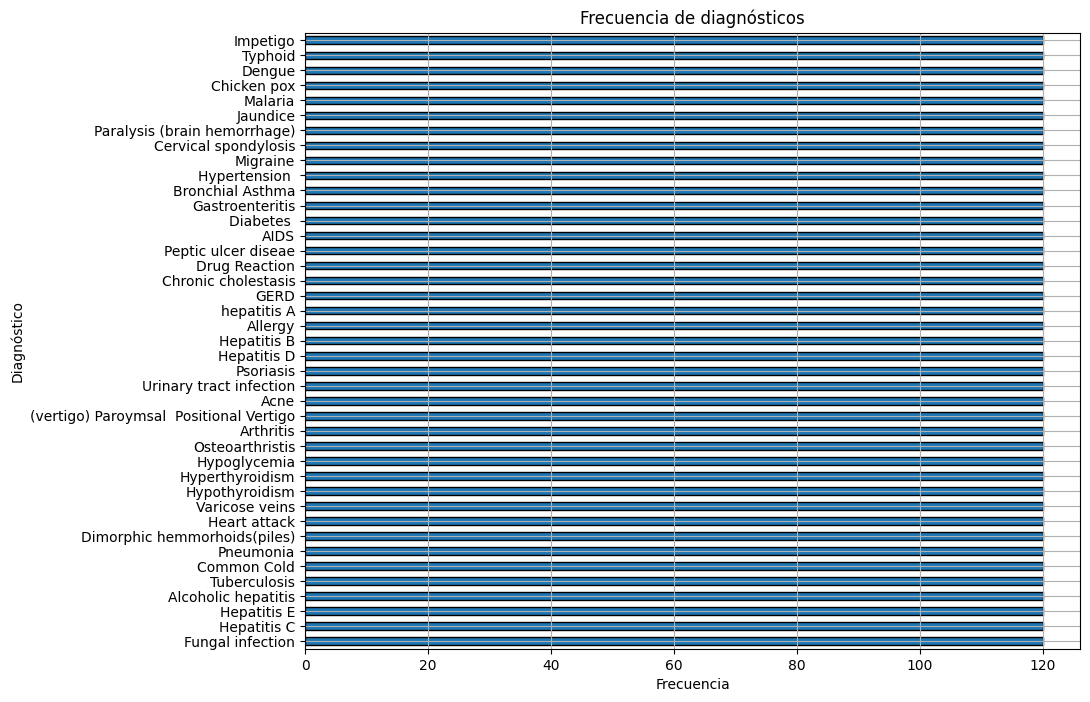

In [ ]:
### GRAFICAR FRECUENCIA DE DIAGNÓSTICOS
diagnosis_freq = df['prognosis'].value_counts()

plt.figure(figsize=(10, 8))
diagnosis_freq.plot(kind='barh', edgecolor='black')
plt.xlabel('Frecuencia')
plt.ylabel('Diagnóstico')
plt.title('Frecuencia de diagnósticos')
plt.grid(True)
plt.show()

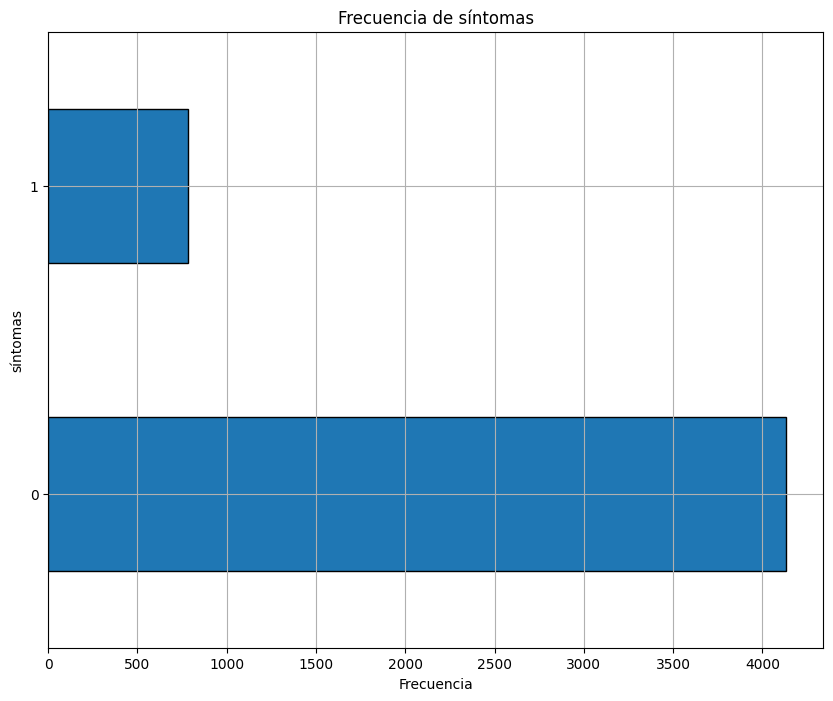

In [ ]:
### GRAFICAR FRECUENCIA DE SÍNTOMAS , A MODO DE EJEMPLO VISUALIZO EL DE RASH EN LA PIEL, PUEDE SER CON CUAQUIERO OTRO SÍNTOMA DE INTERES.

diagnosis_freq = df['skin_rash'].value_counts()

plt.figure(figsize=(10, 8))
diagnosis_freq.plot(kind='barh', edgecolor='black')
plt.xlabel('Frecuencia')
plt.ylabel('síntomas')
plt.title('Frecuencia de síntomas')
plt.grid(True)
plt.show()

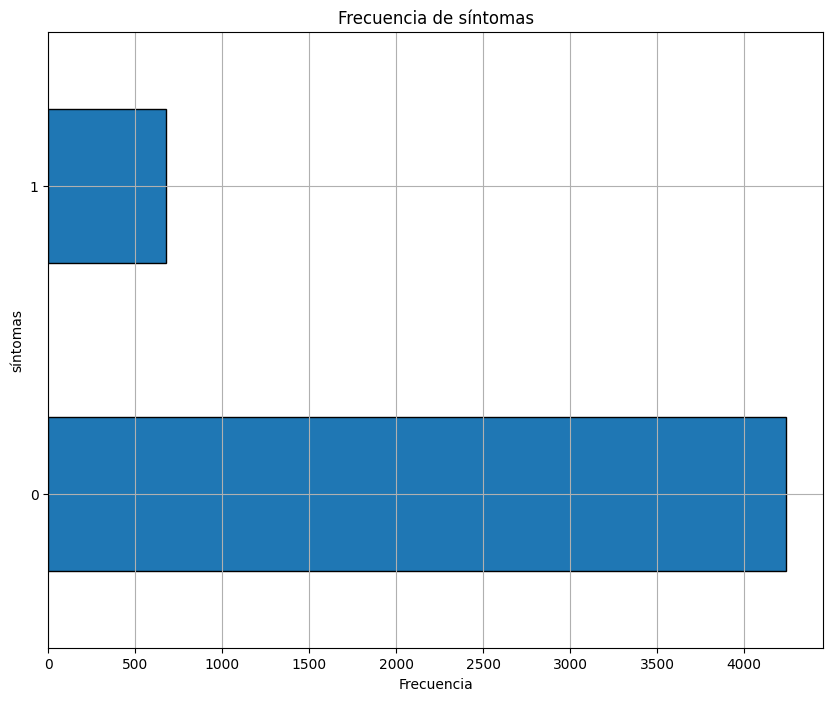

In [ ]:
diagnosis_freq = df['itching'].value_counts()

plt.figure(figsize=(10, 8))
diagnosis_freq.plot(kind='barh', edgecolor='black')
plt.xlabel('Frecuencia')
plt.ylabel('síntomas')
plt.title('Frecuencia de síntomas')
plt.grid(True)
plt.show()

<Figure size 2000x1200 with 0 Axes>

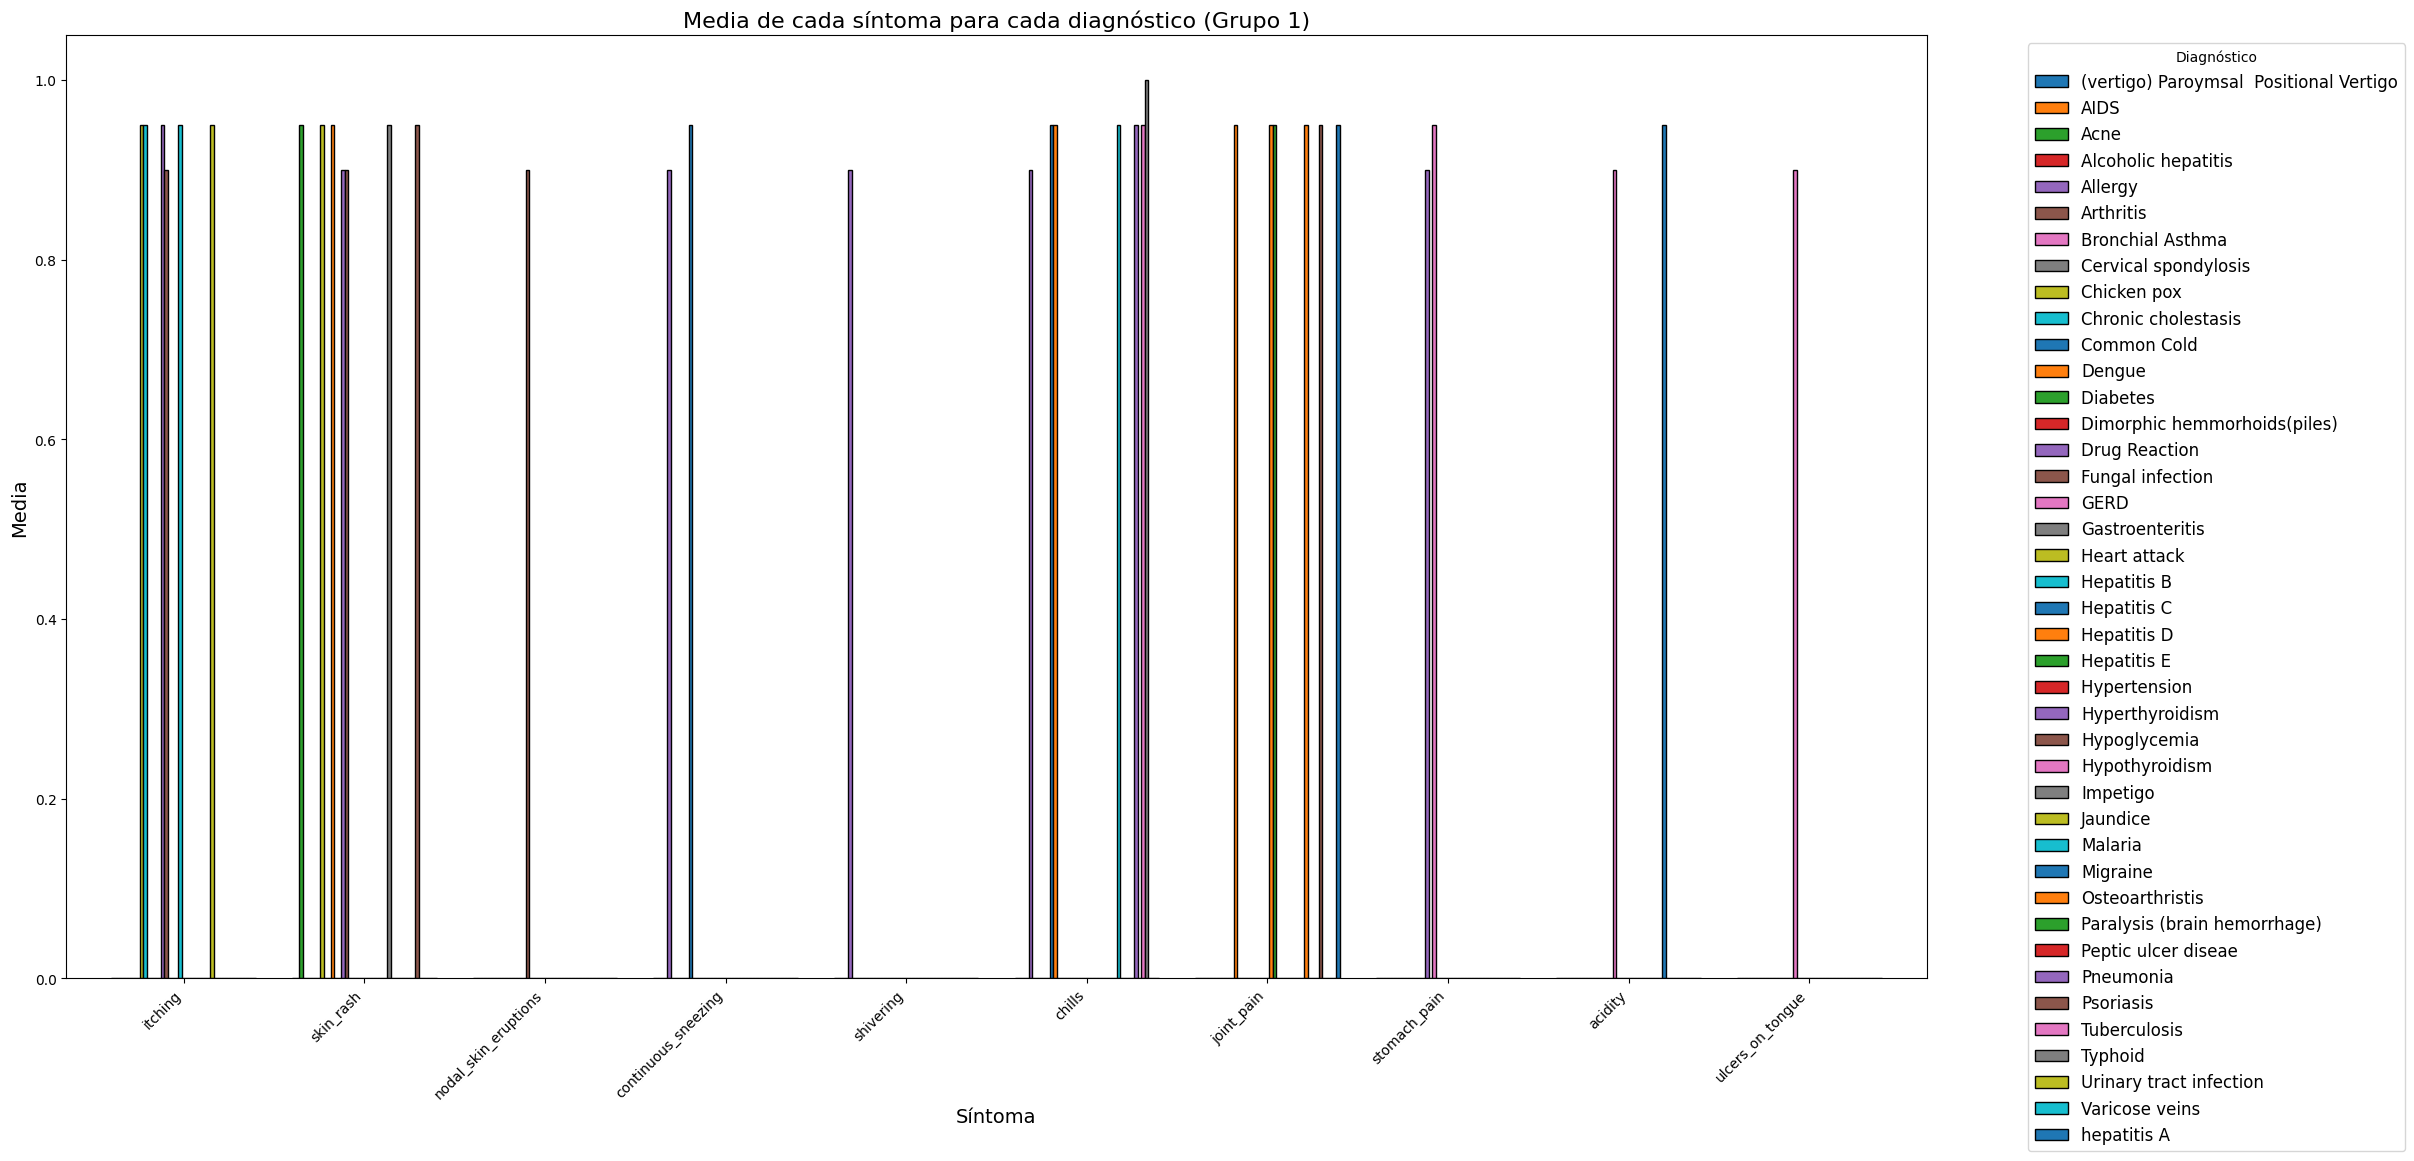

<Figure size 2000x1200 with 0 Axes>

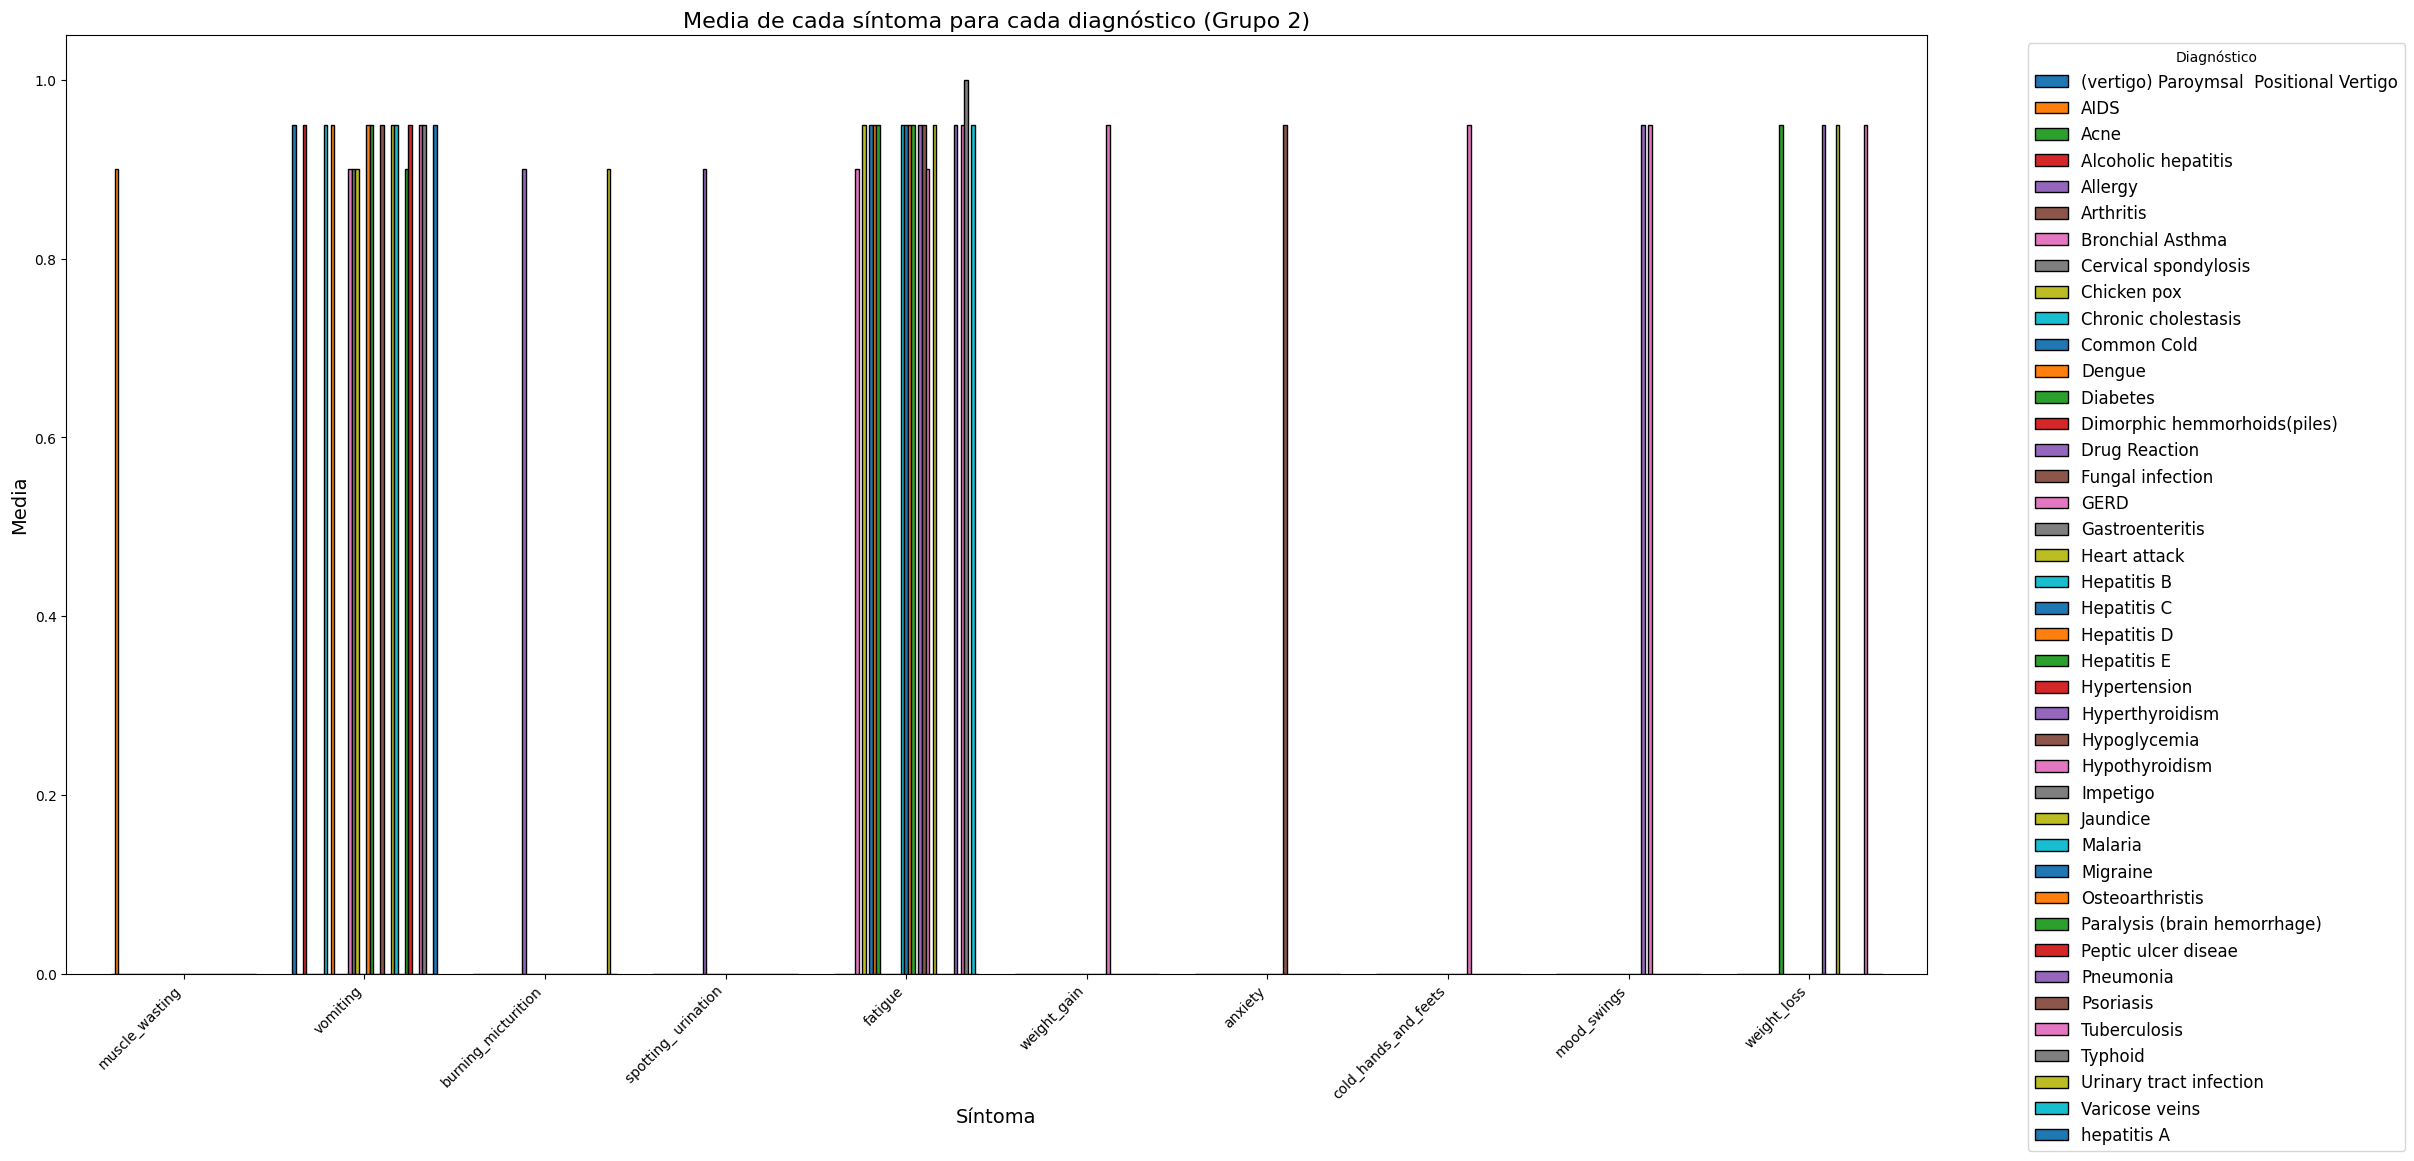

<Figure size 2000x1200 with 0 Axes>

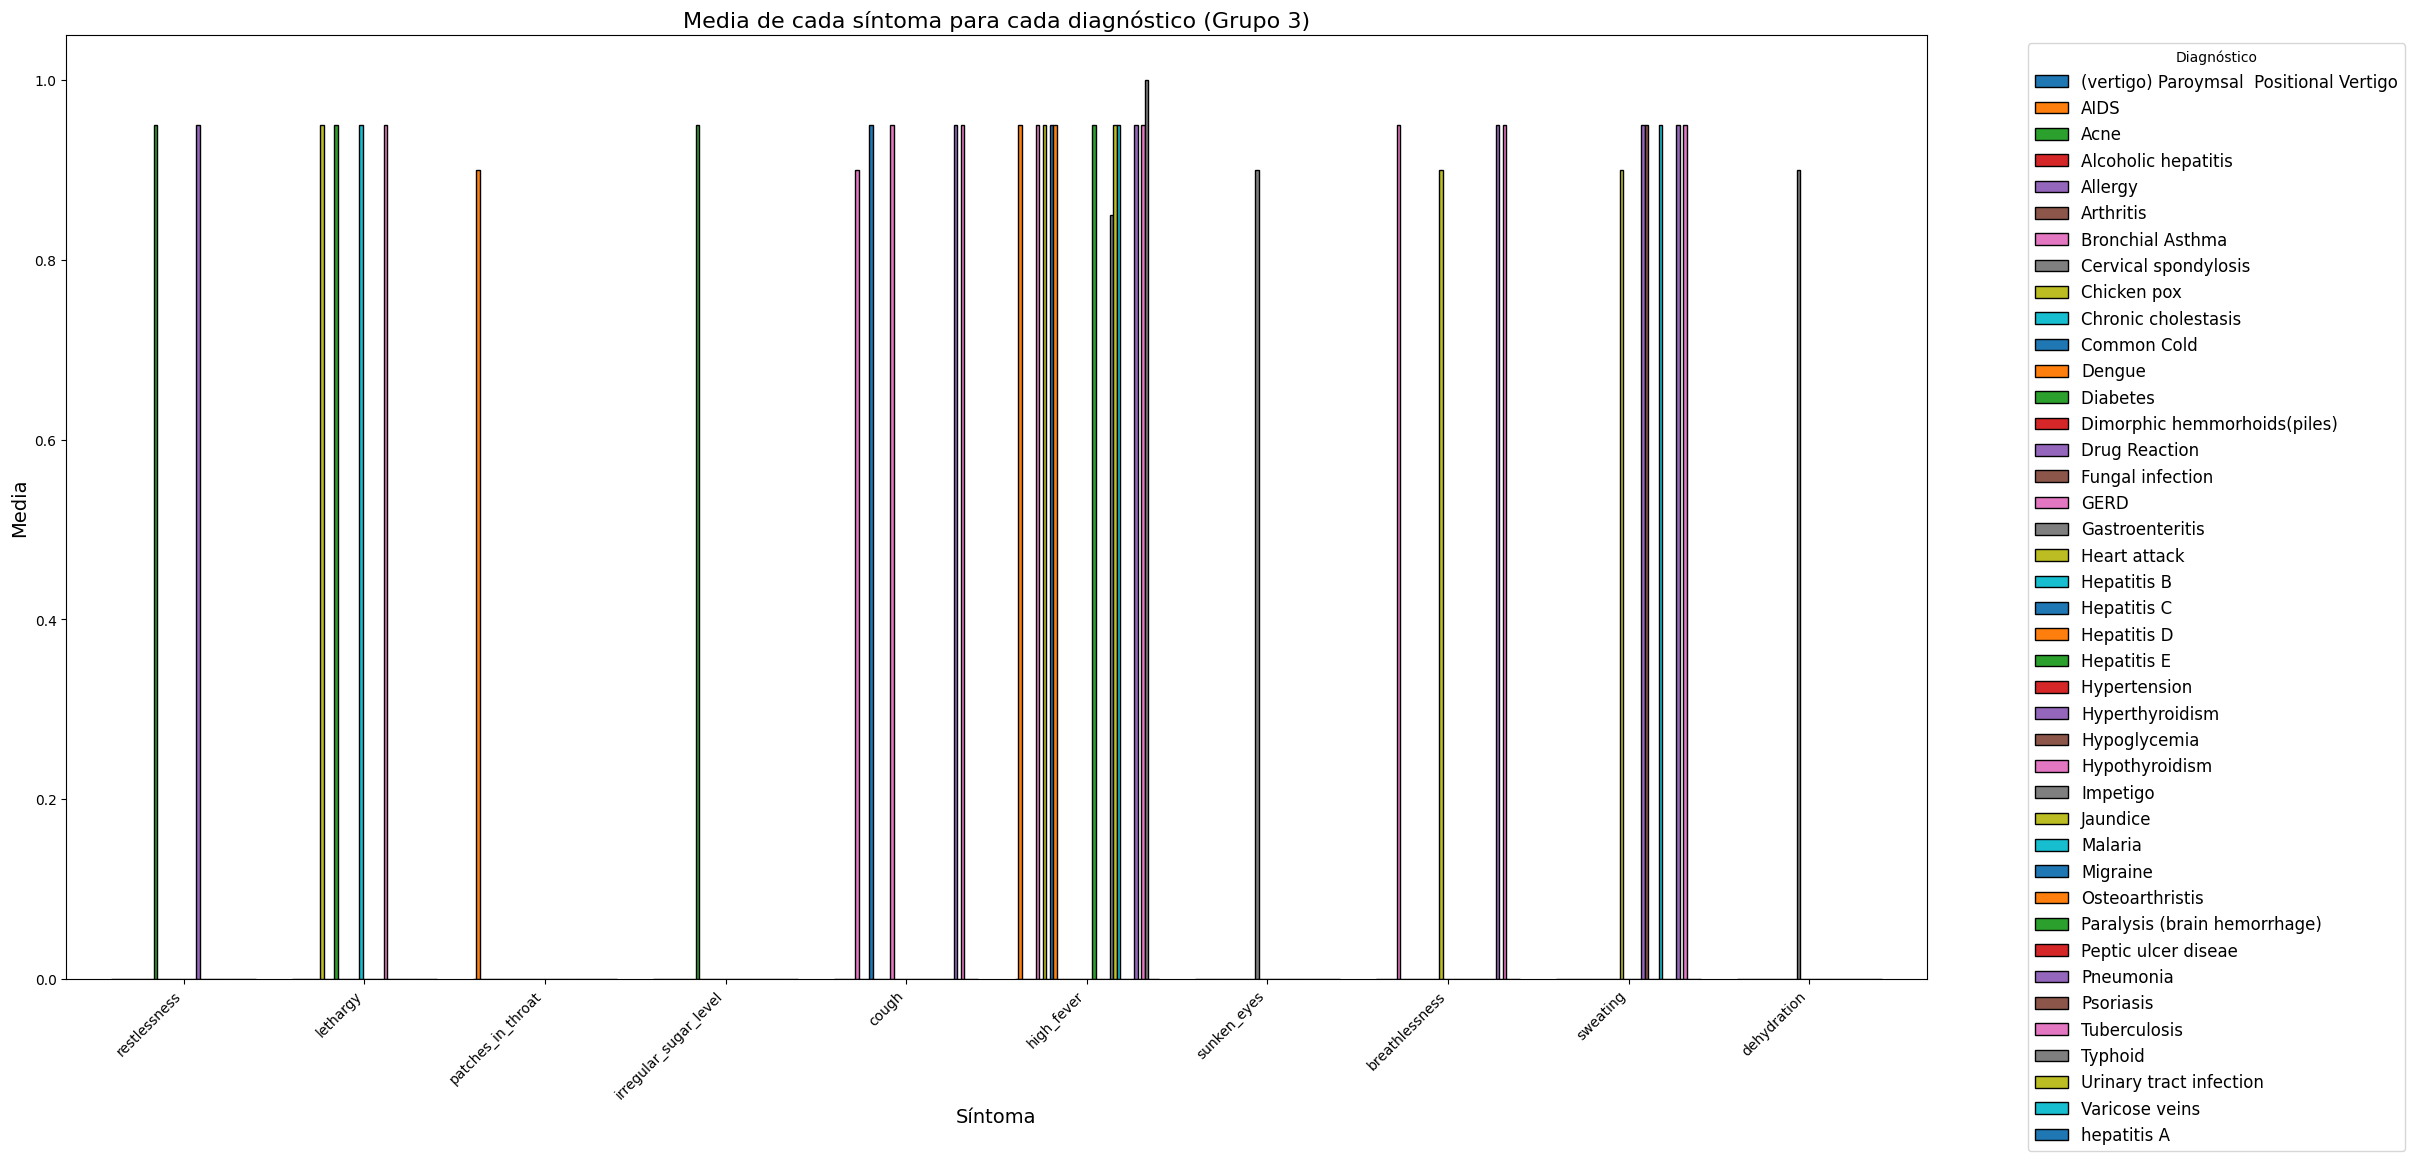

<Figure size 2000x1200 with 0 Axes>

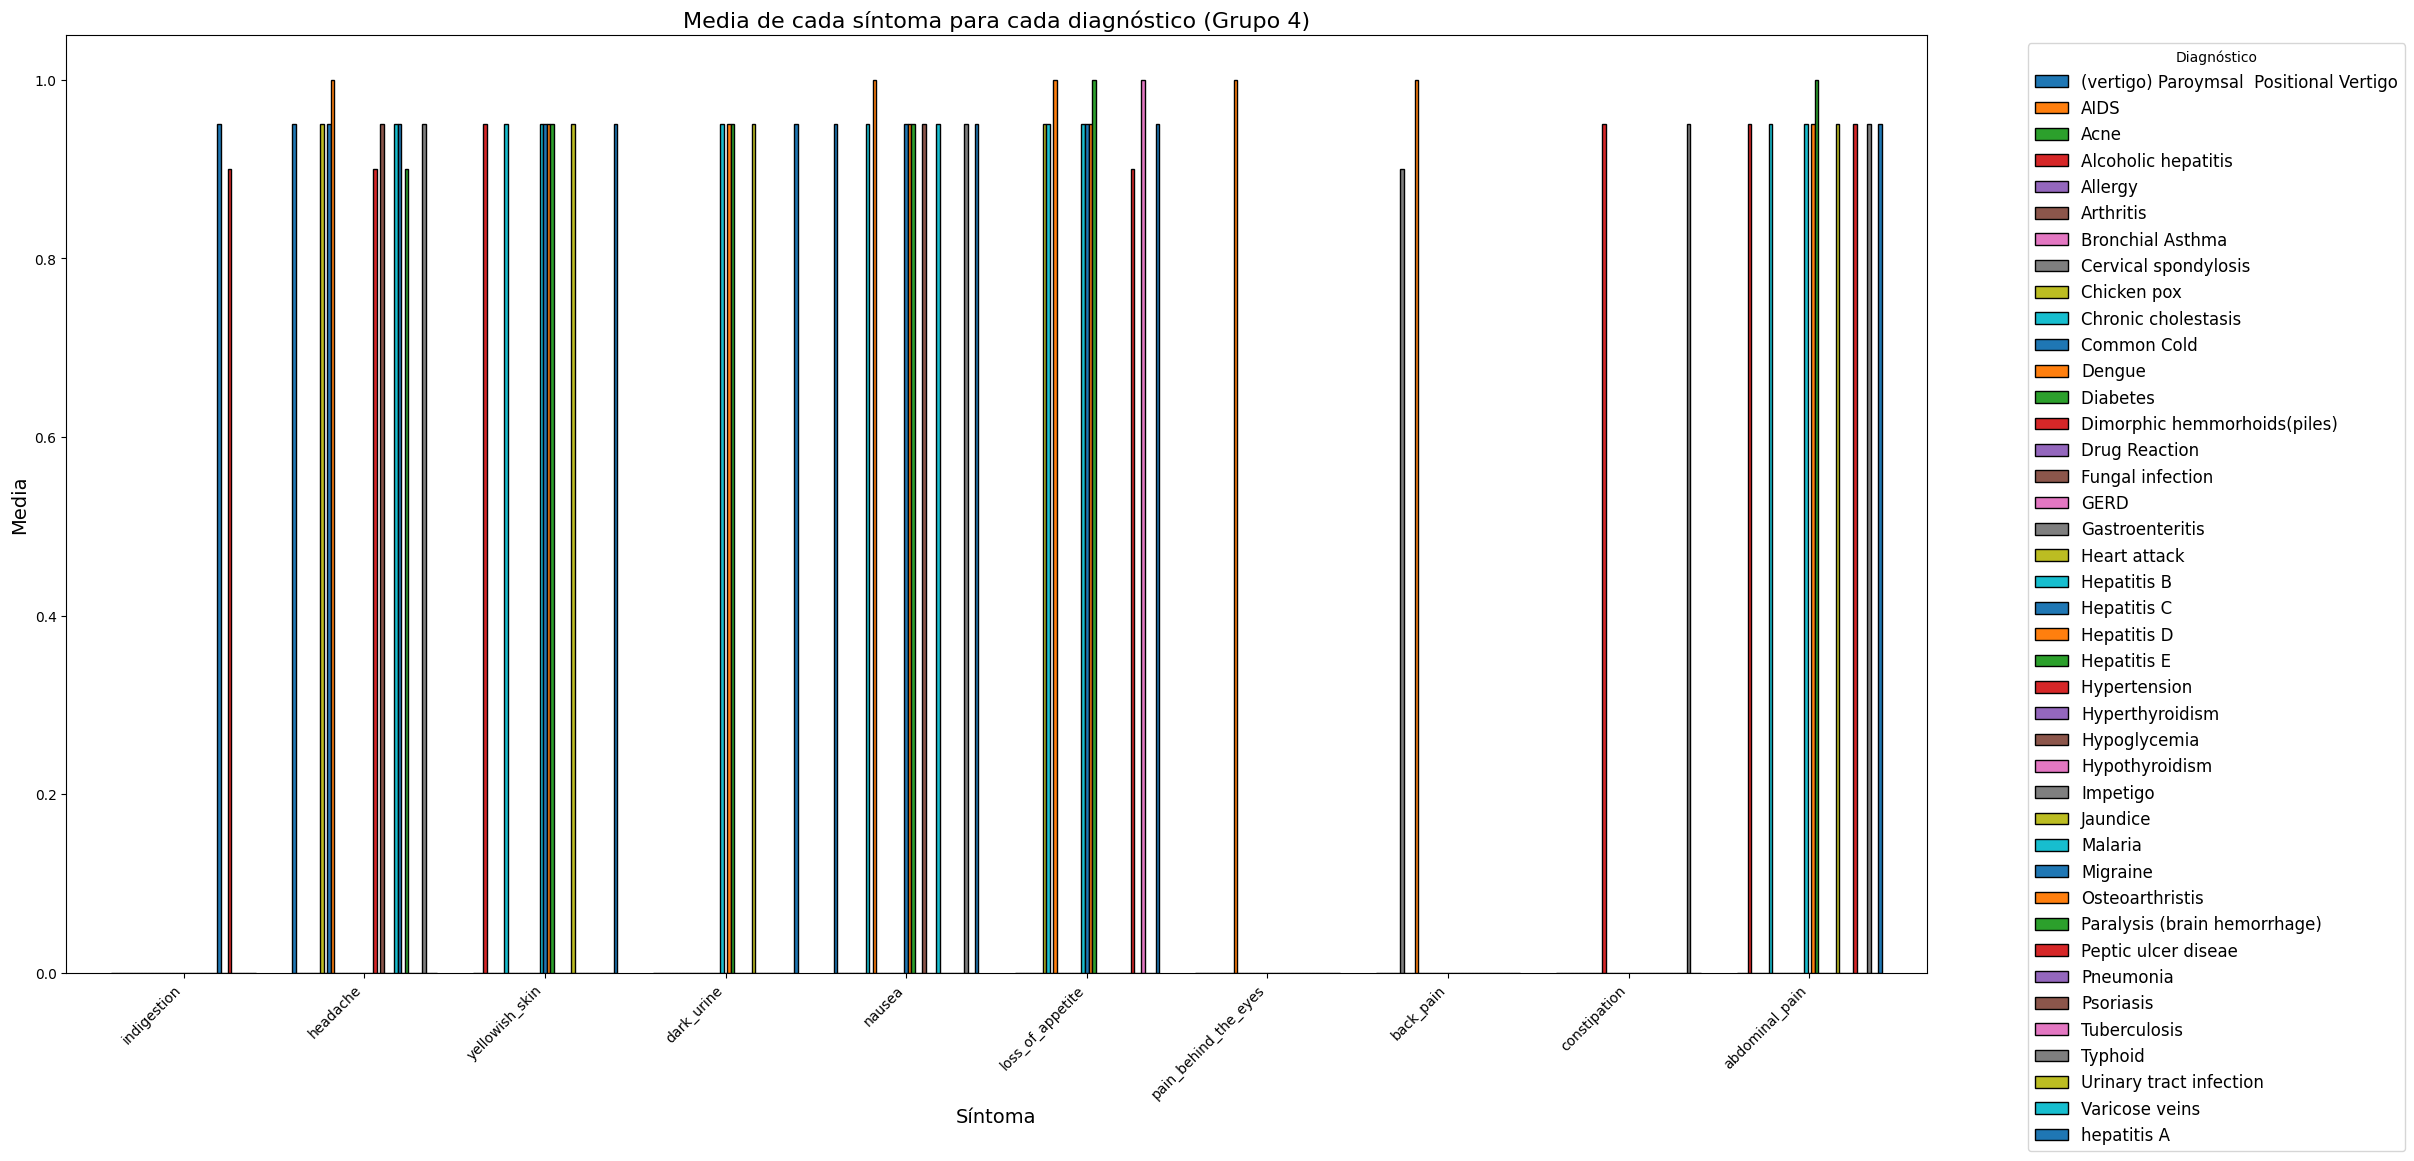

<Figure size 2000x1200 with 0 Axes>

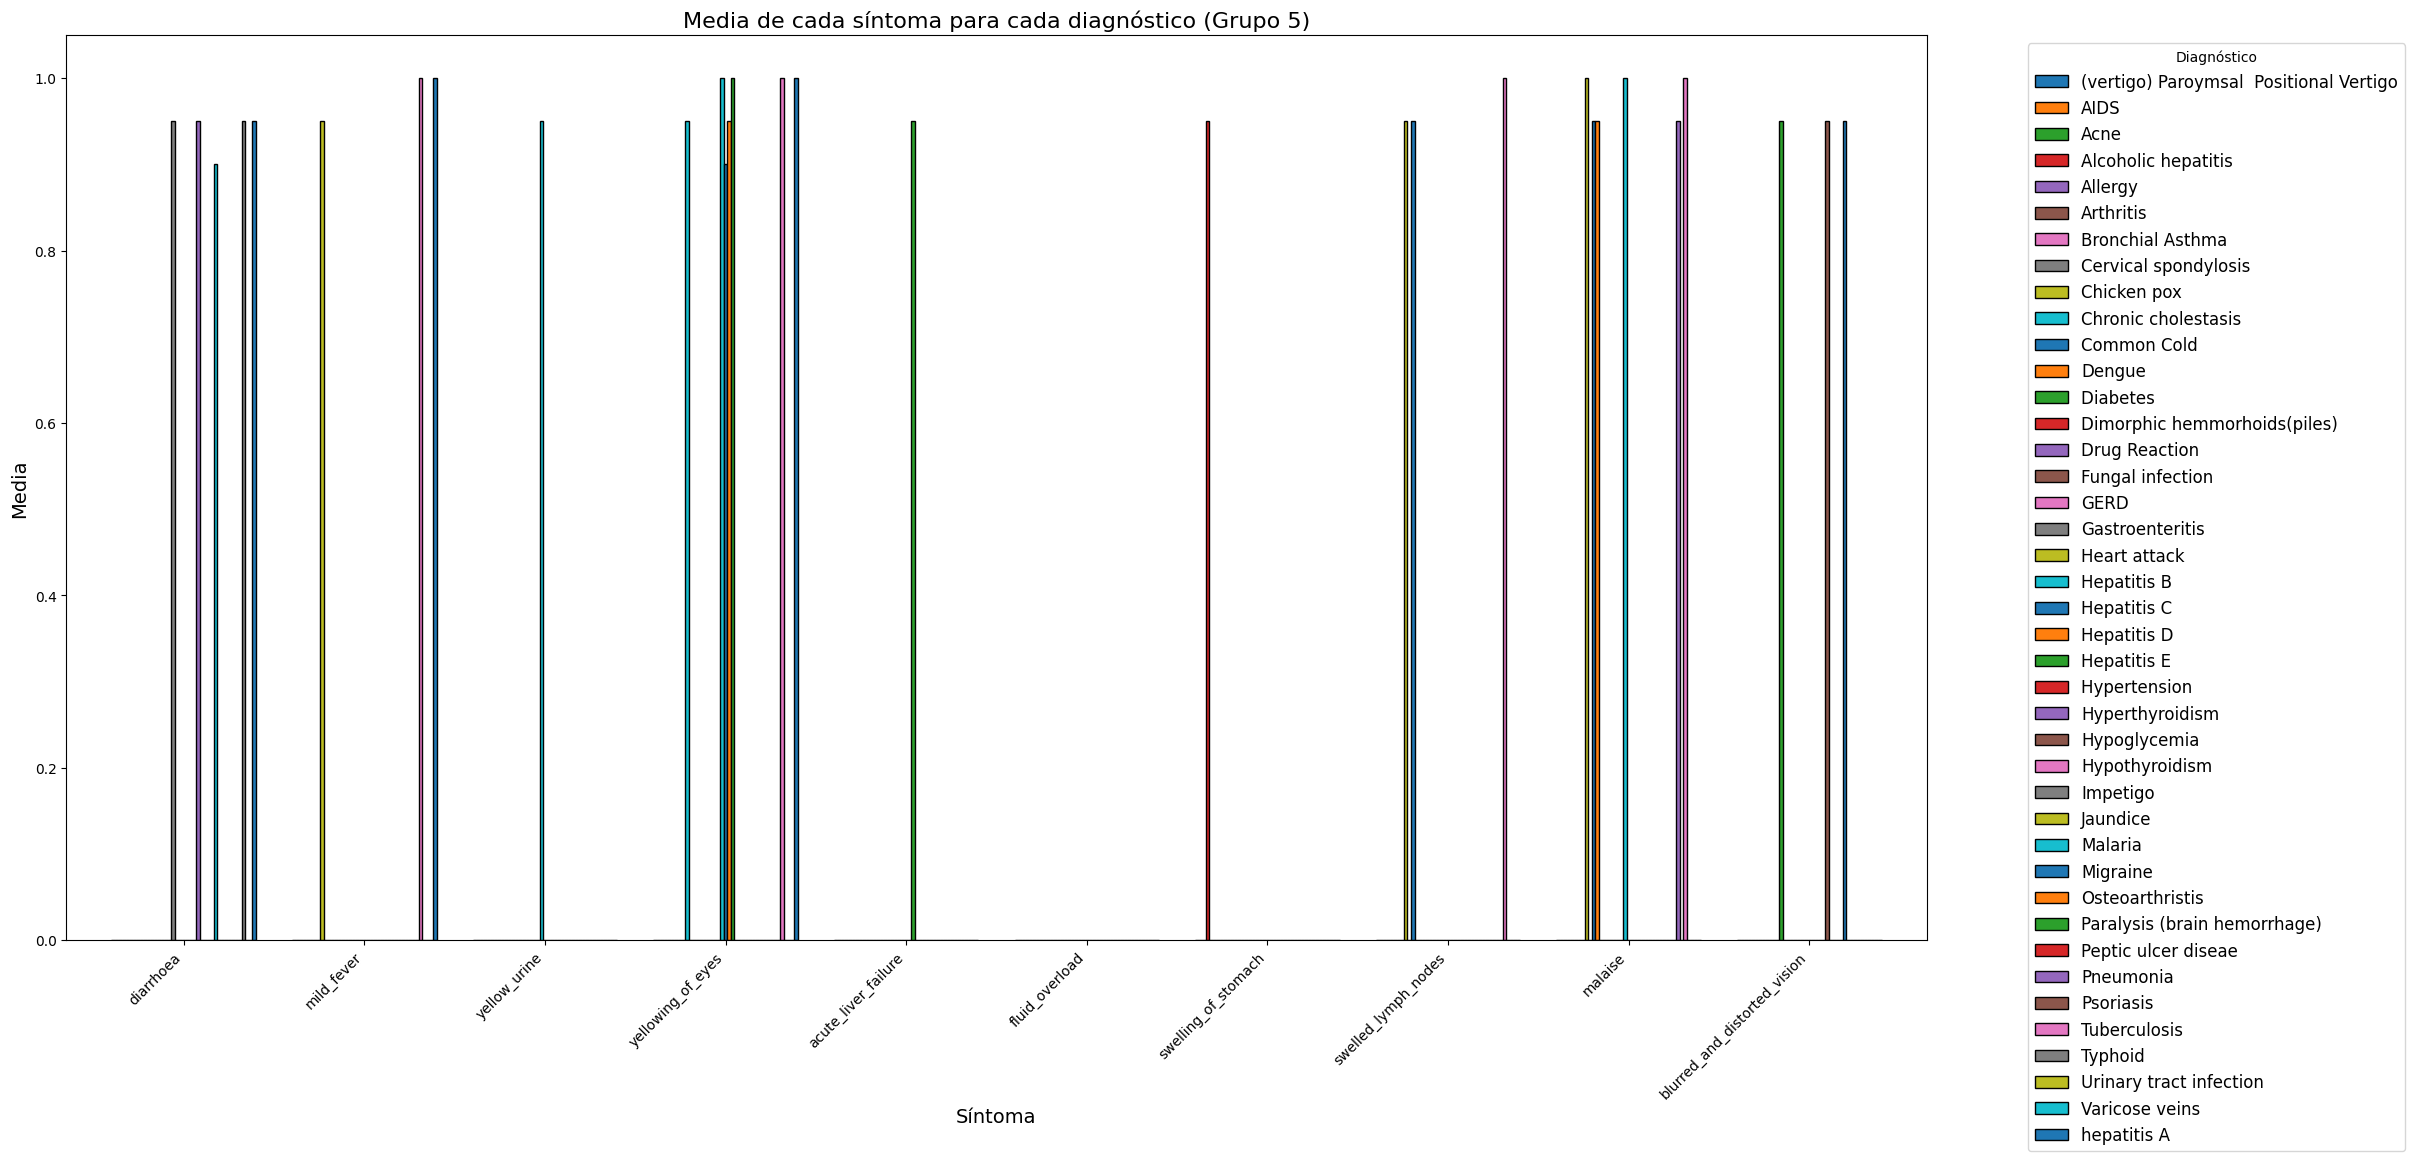

<Figure size 2000x1200 with 0 Axes>

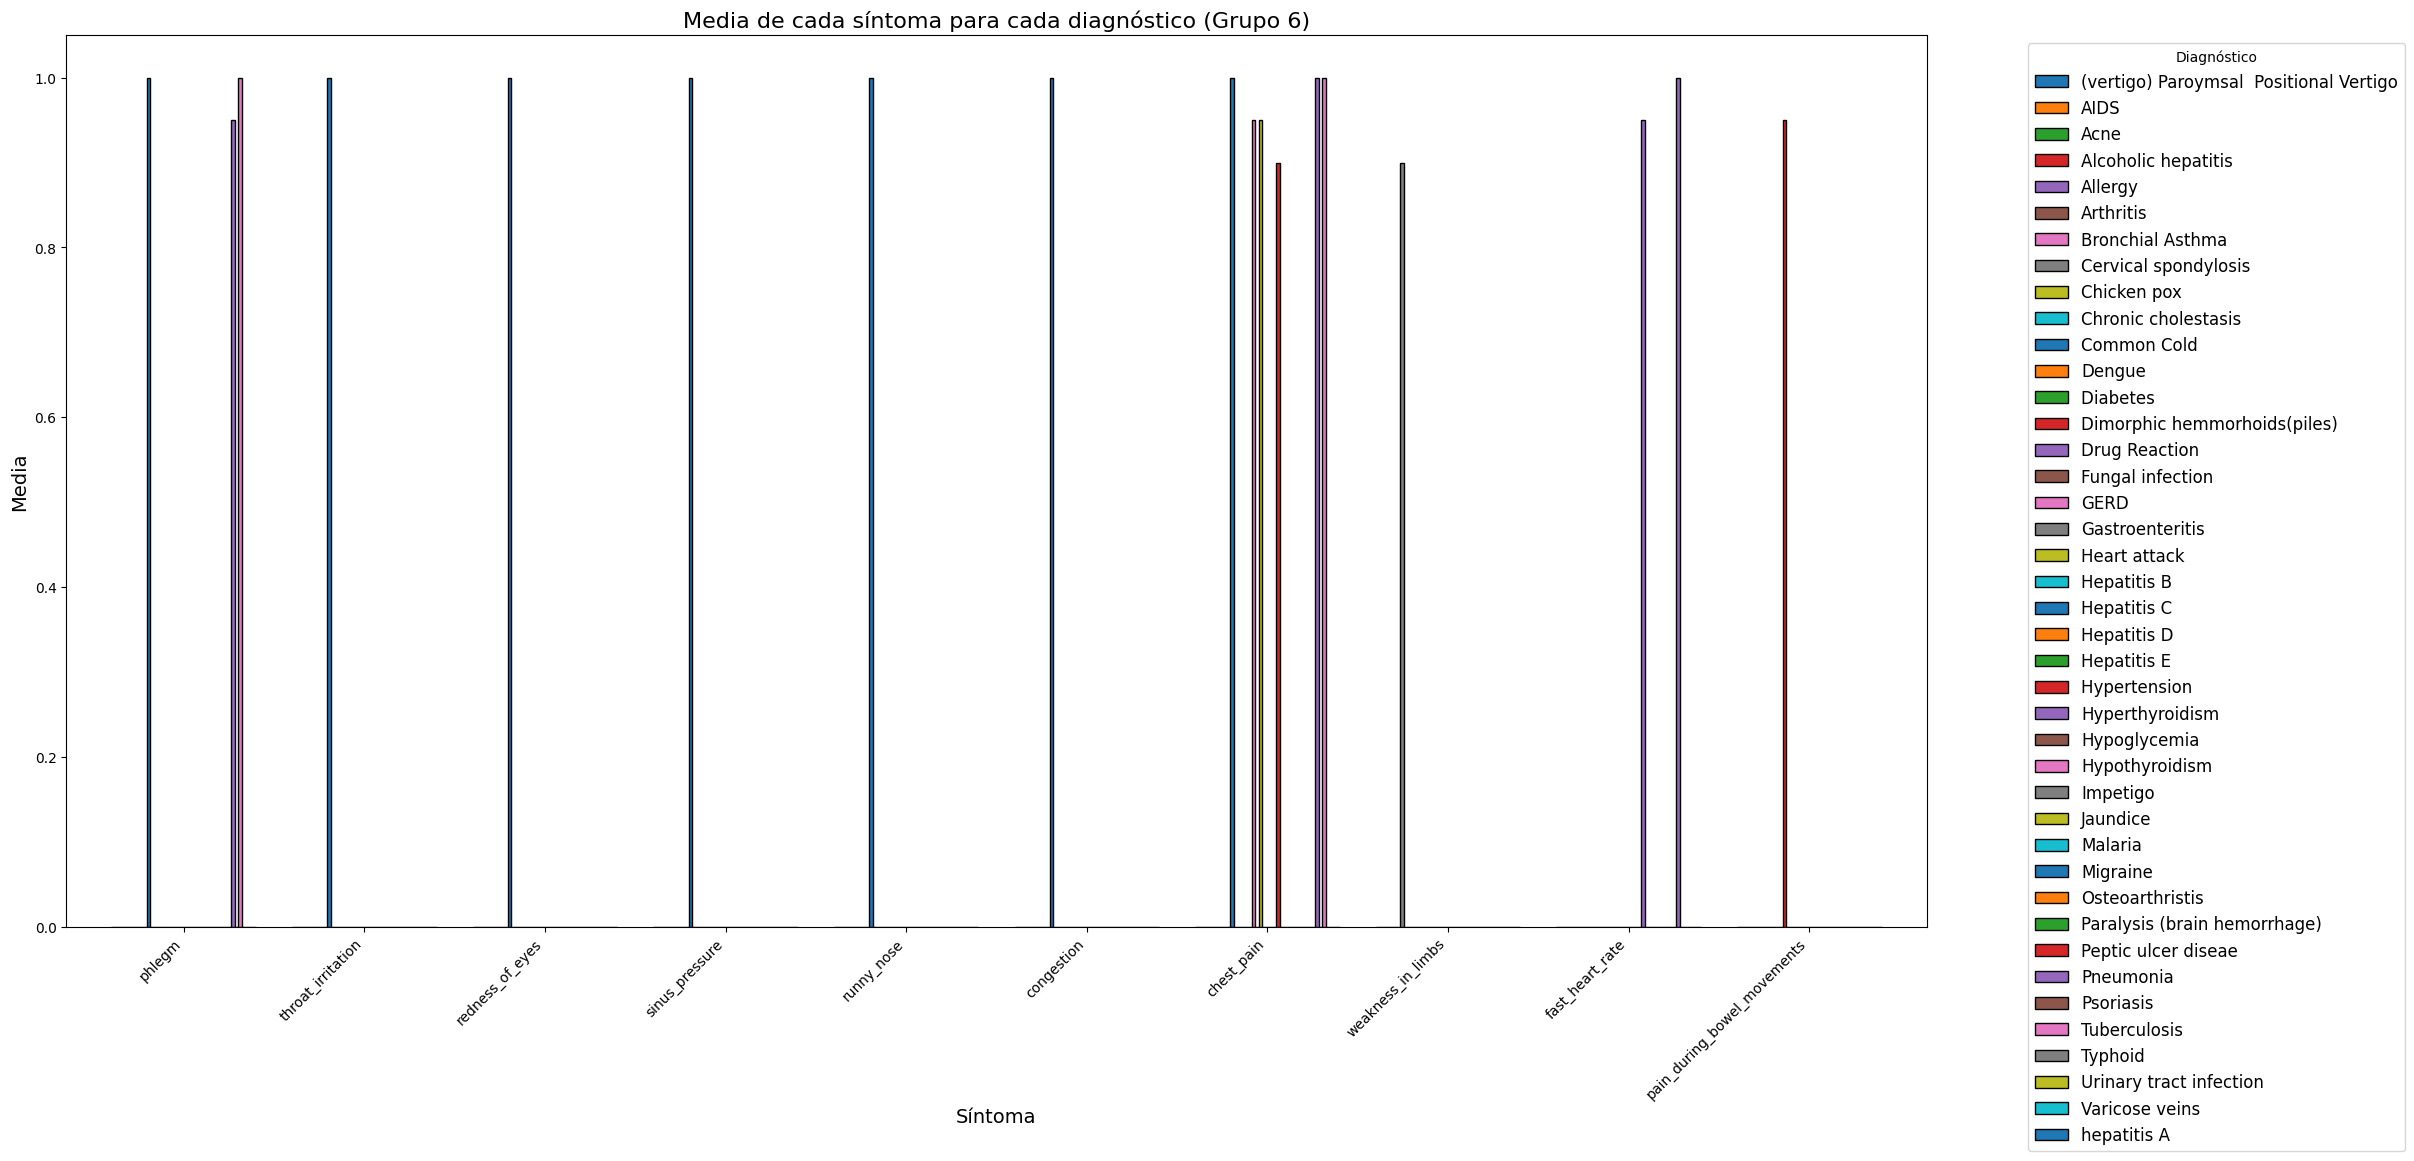

<Figure size 2000x1200 with 0 Axes>

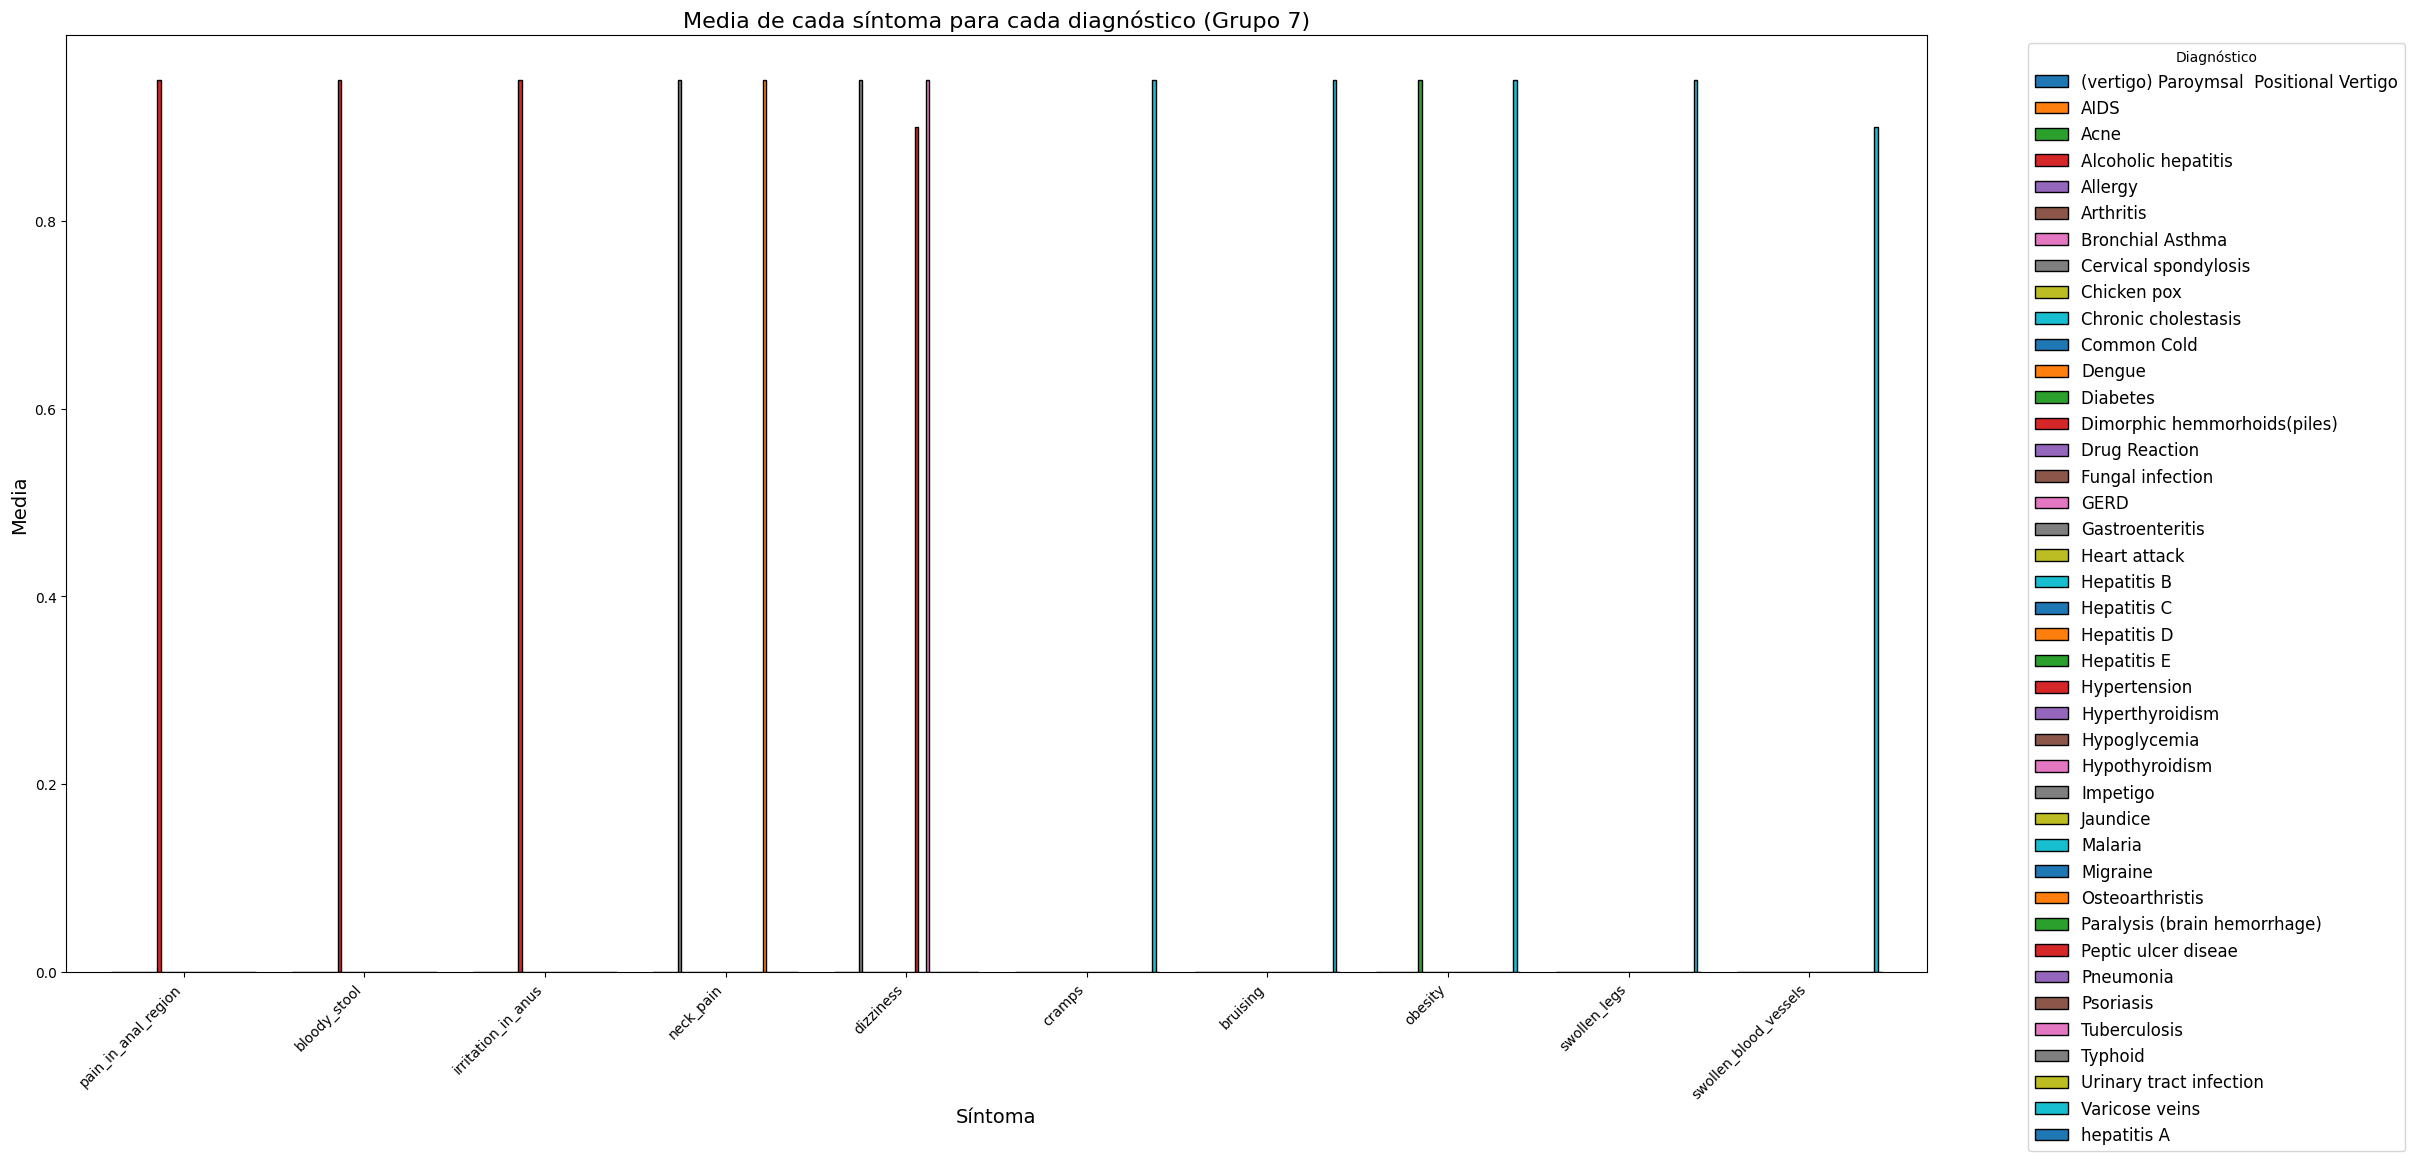

<Figure size 2000x1200 with 0 Axes>

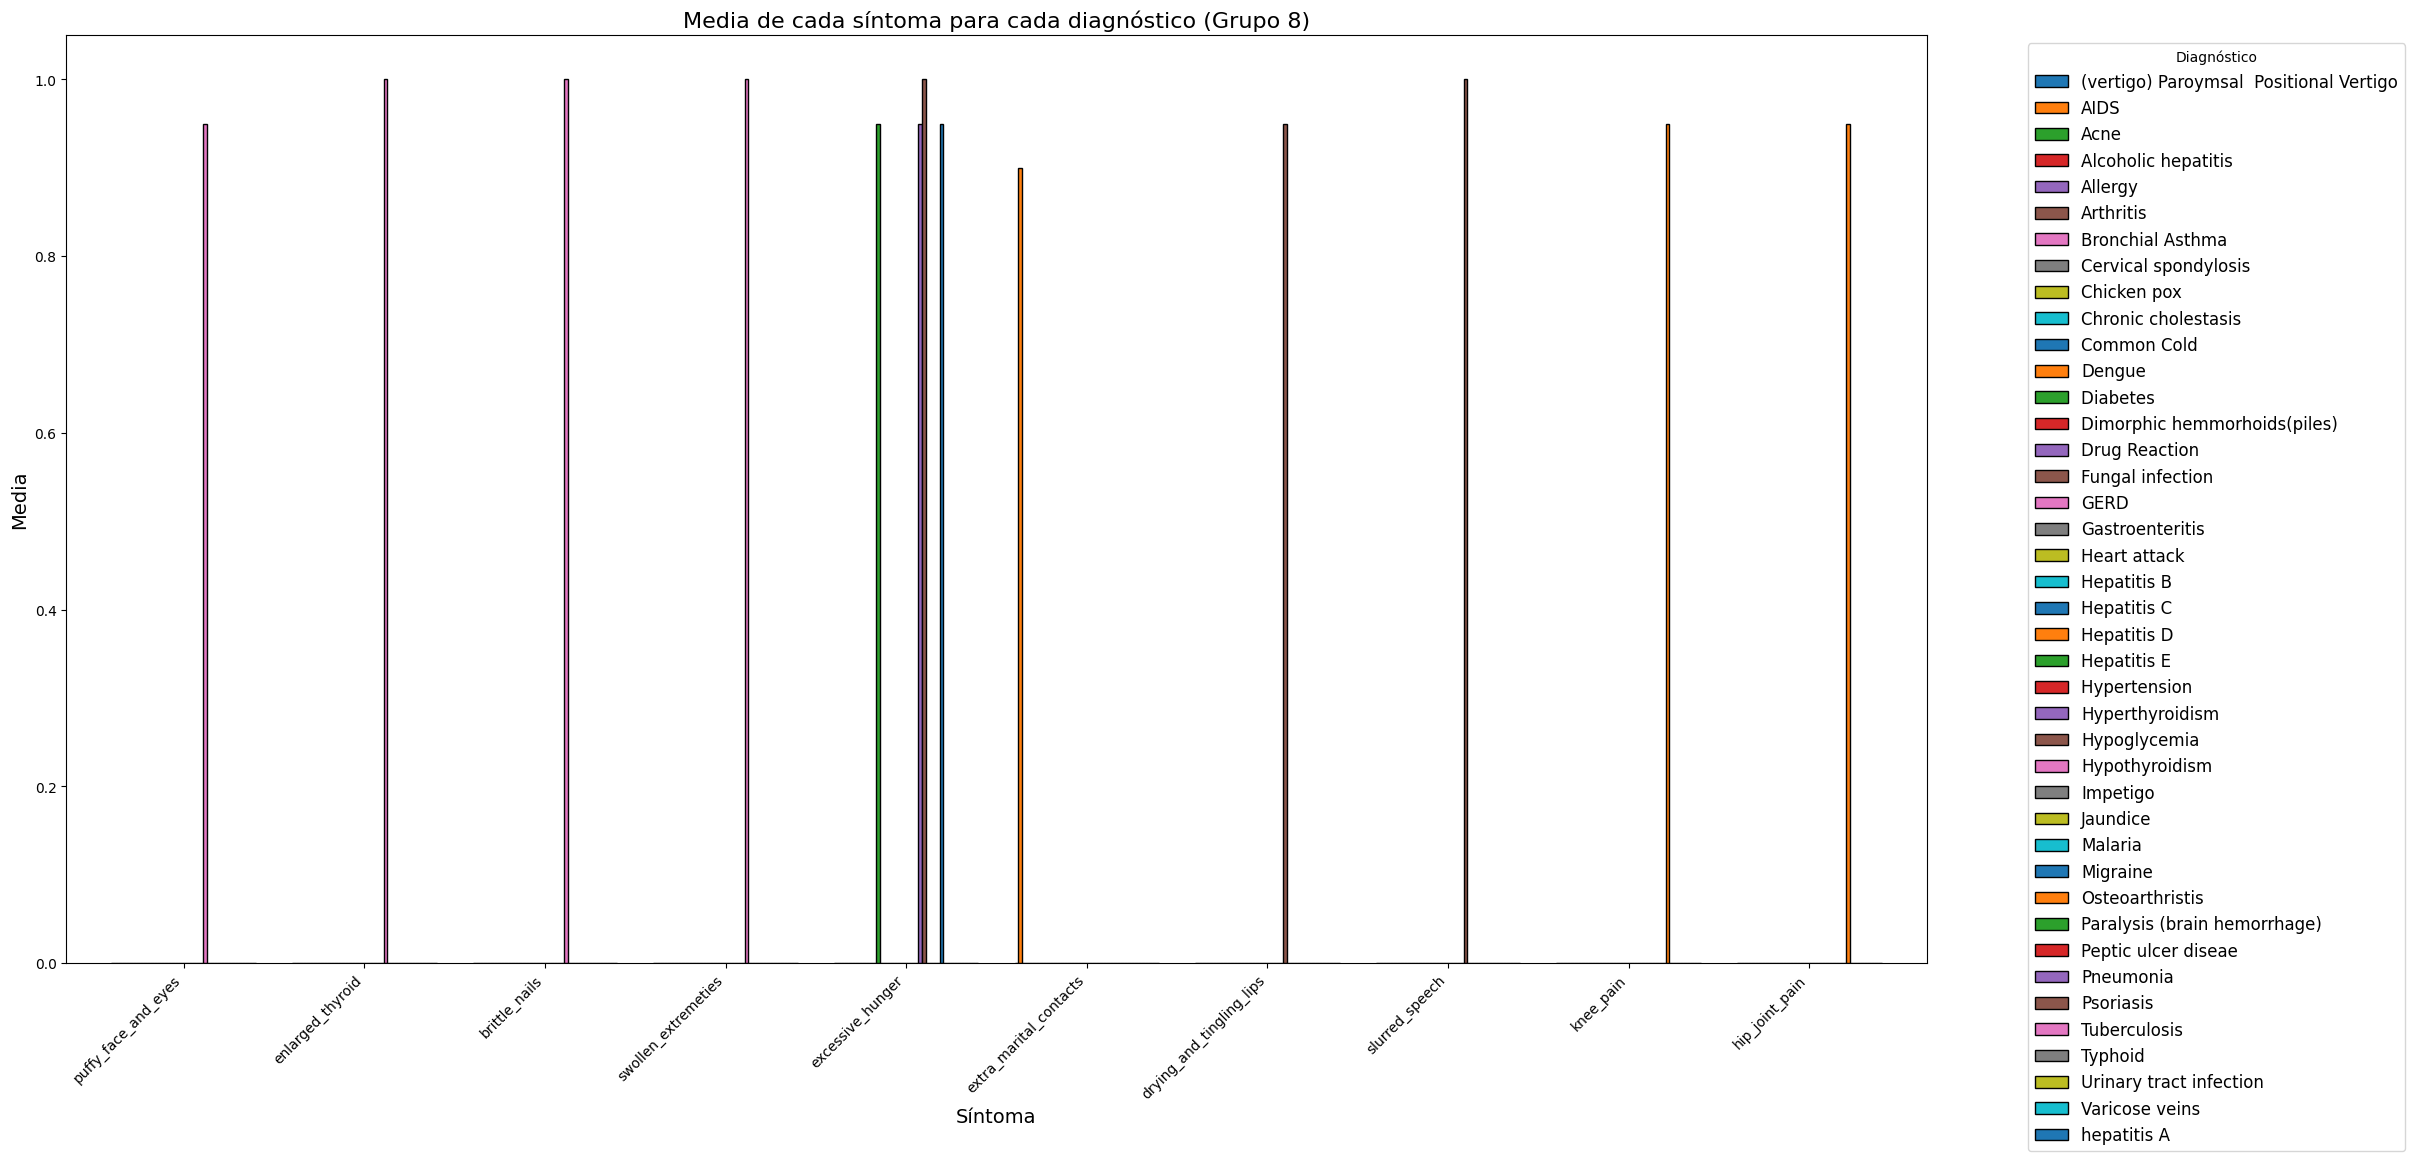

<Figure size 2000x1200 with 0 Axes>

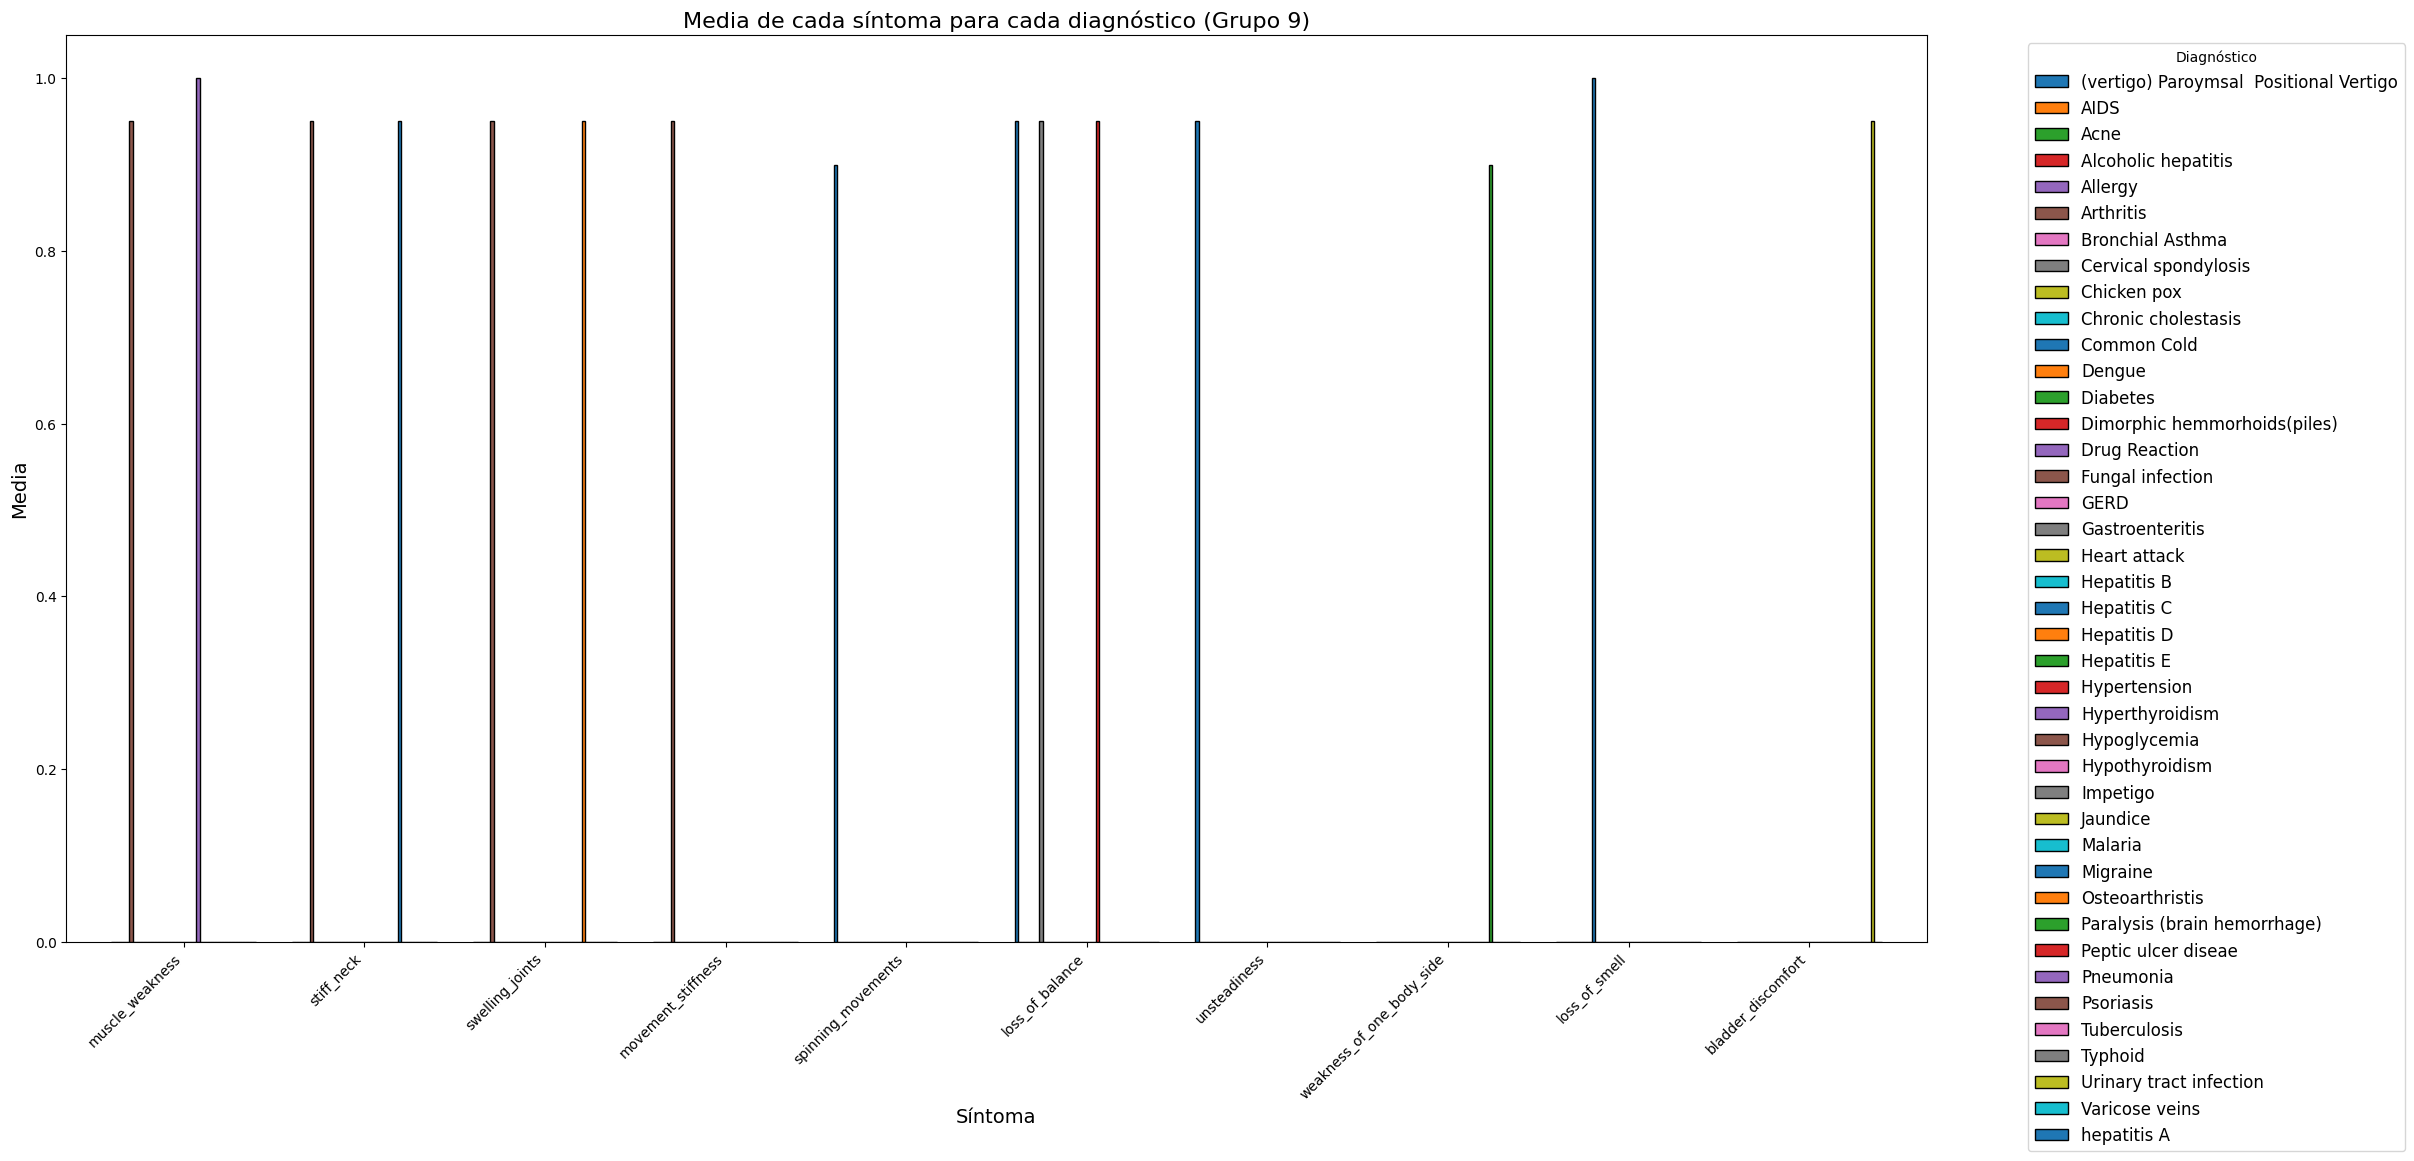

<Figure size 2000x1200 with 0 Axes>

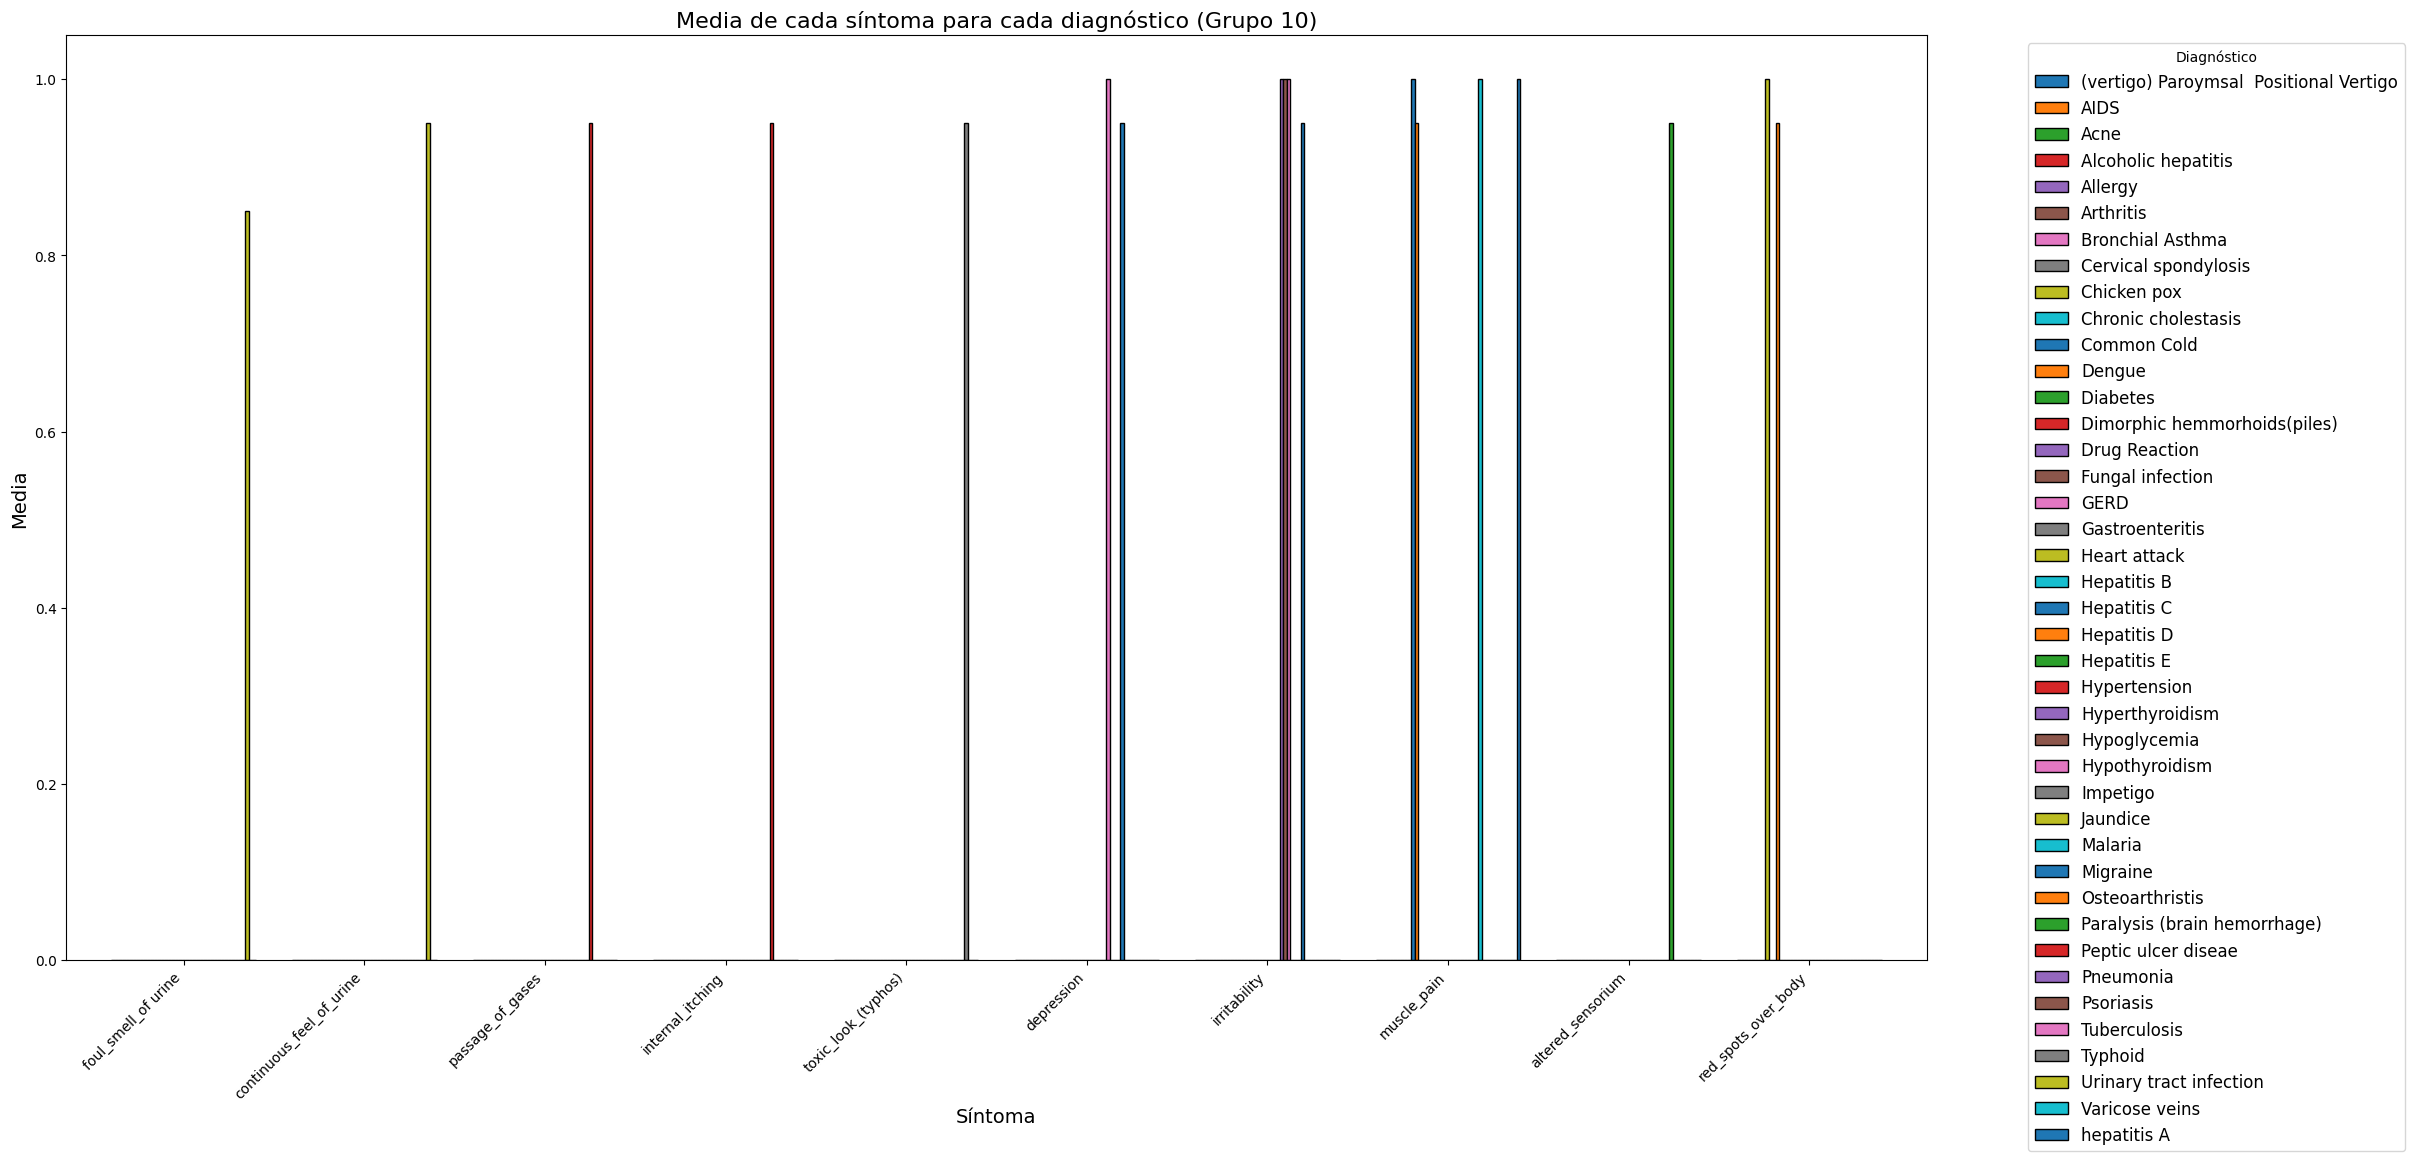

<Figure size 2000x1200 with 0 Axes>

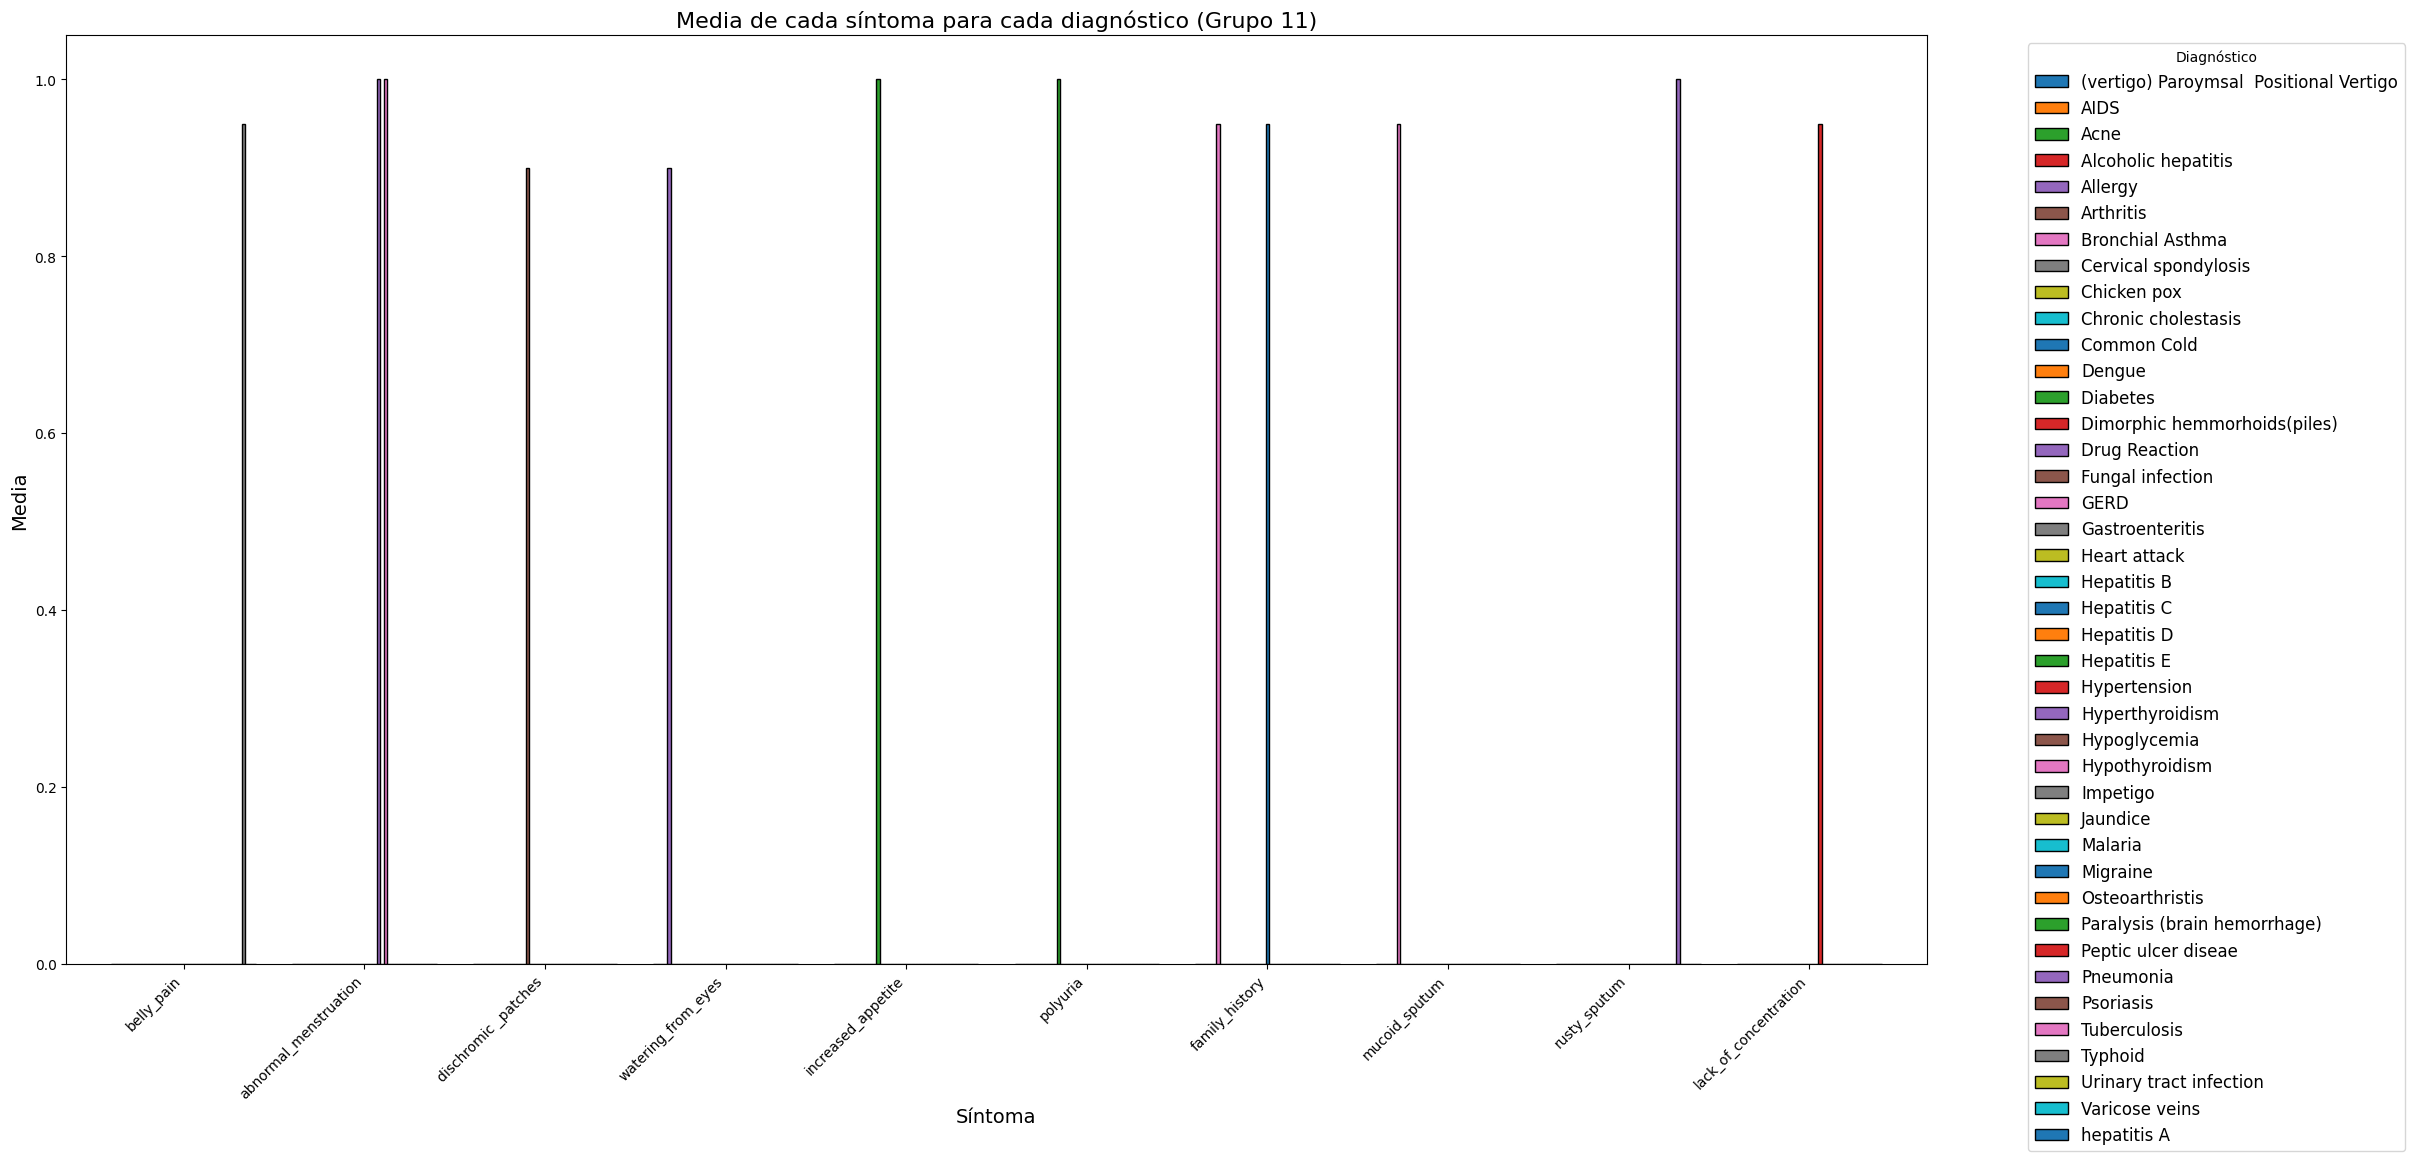

<Figure size 2000x1200 with 0 Axes>

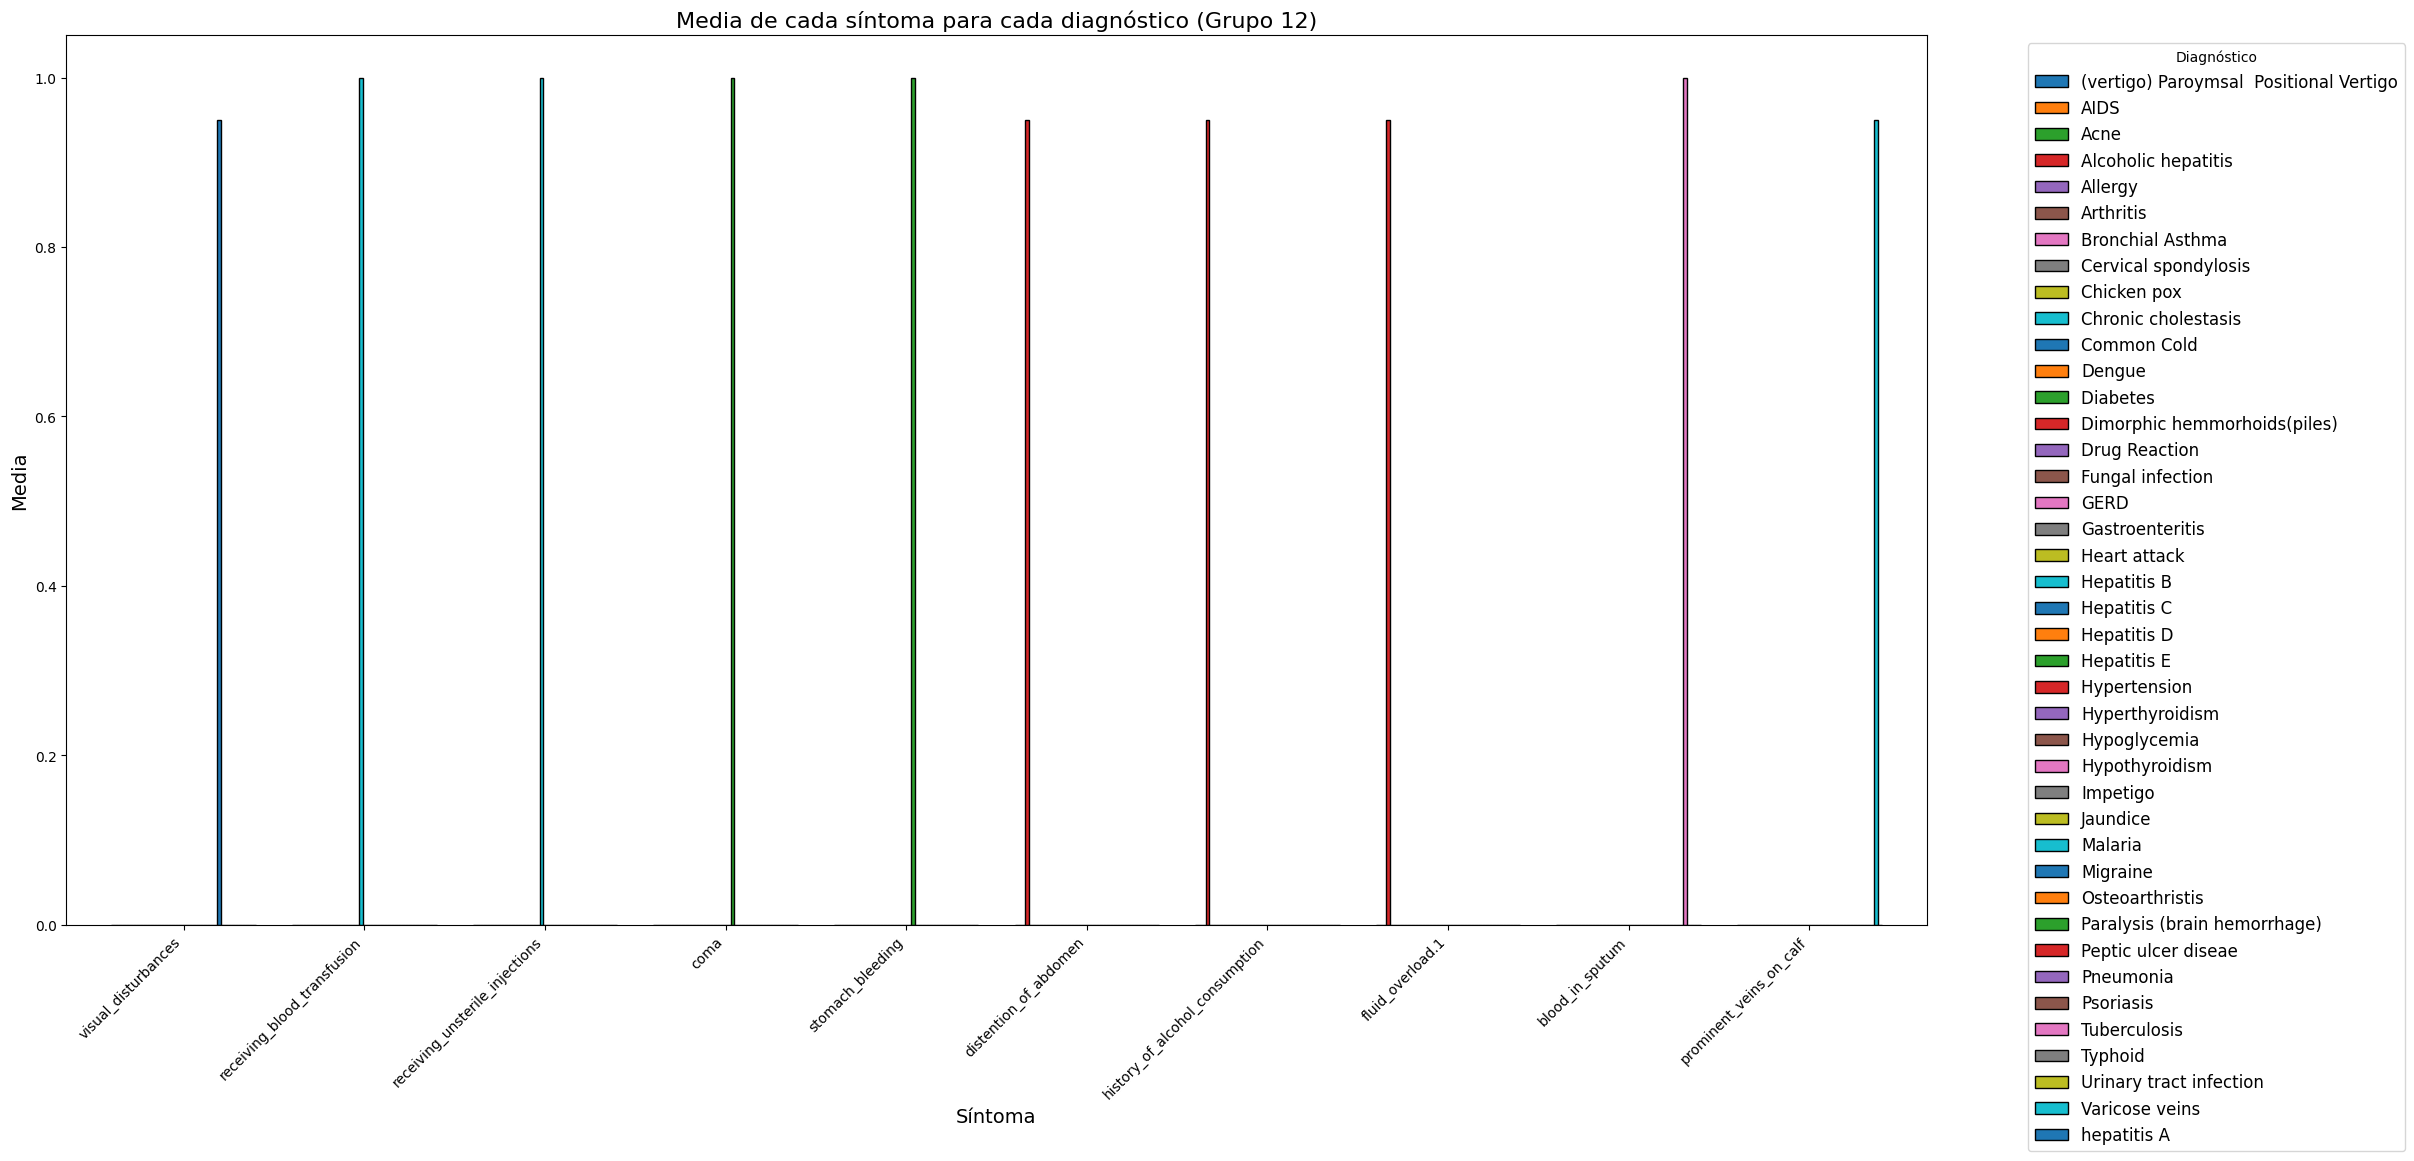

<Figure size 2000x1200 with 0 Axes>

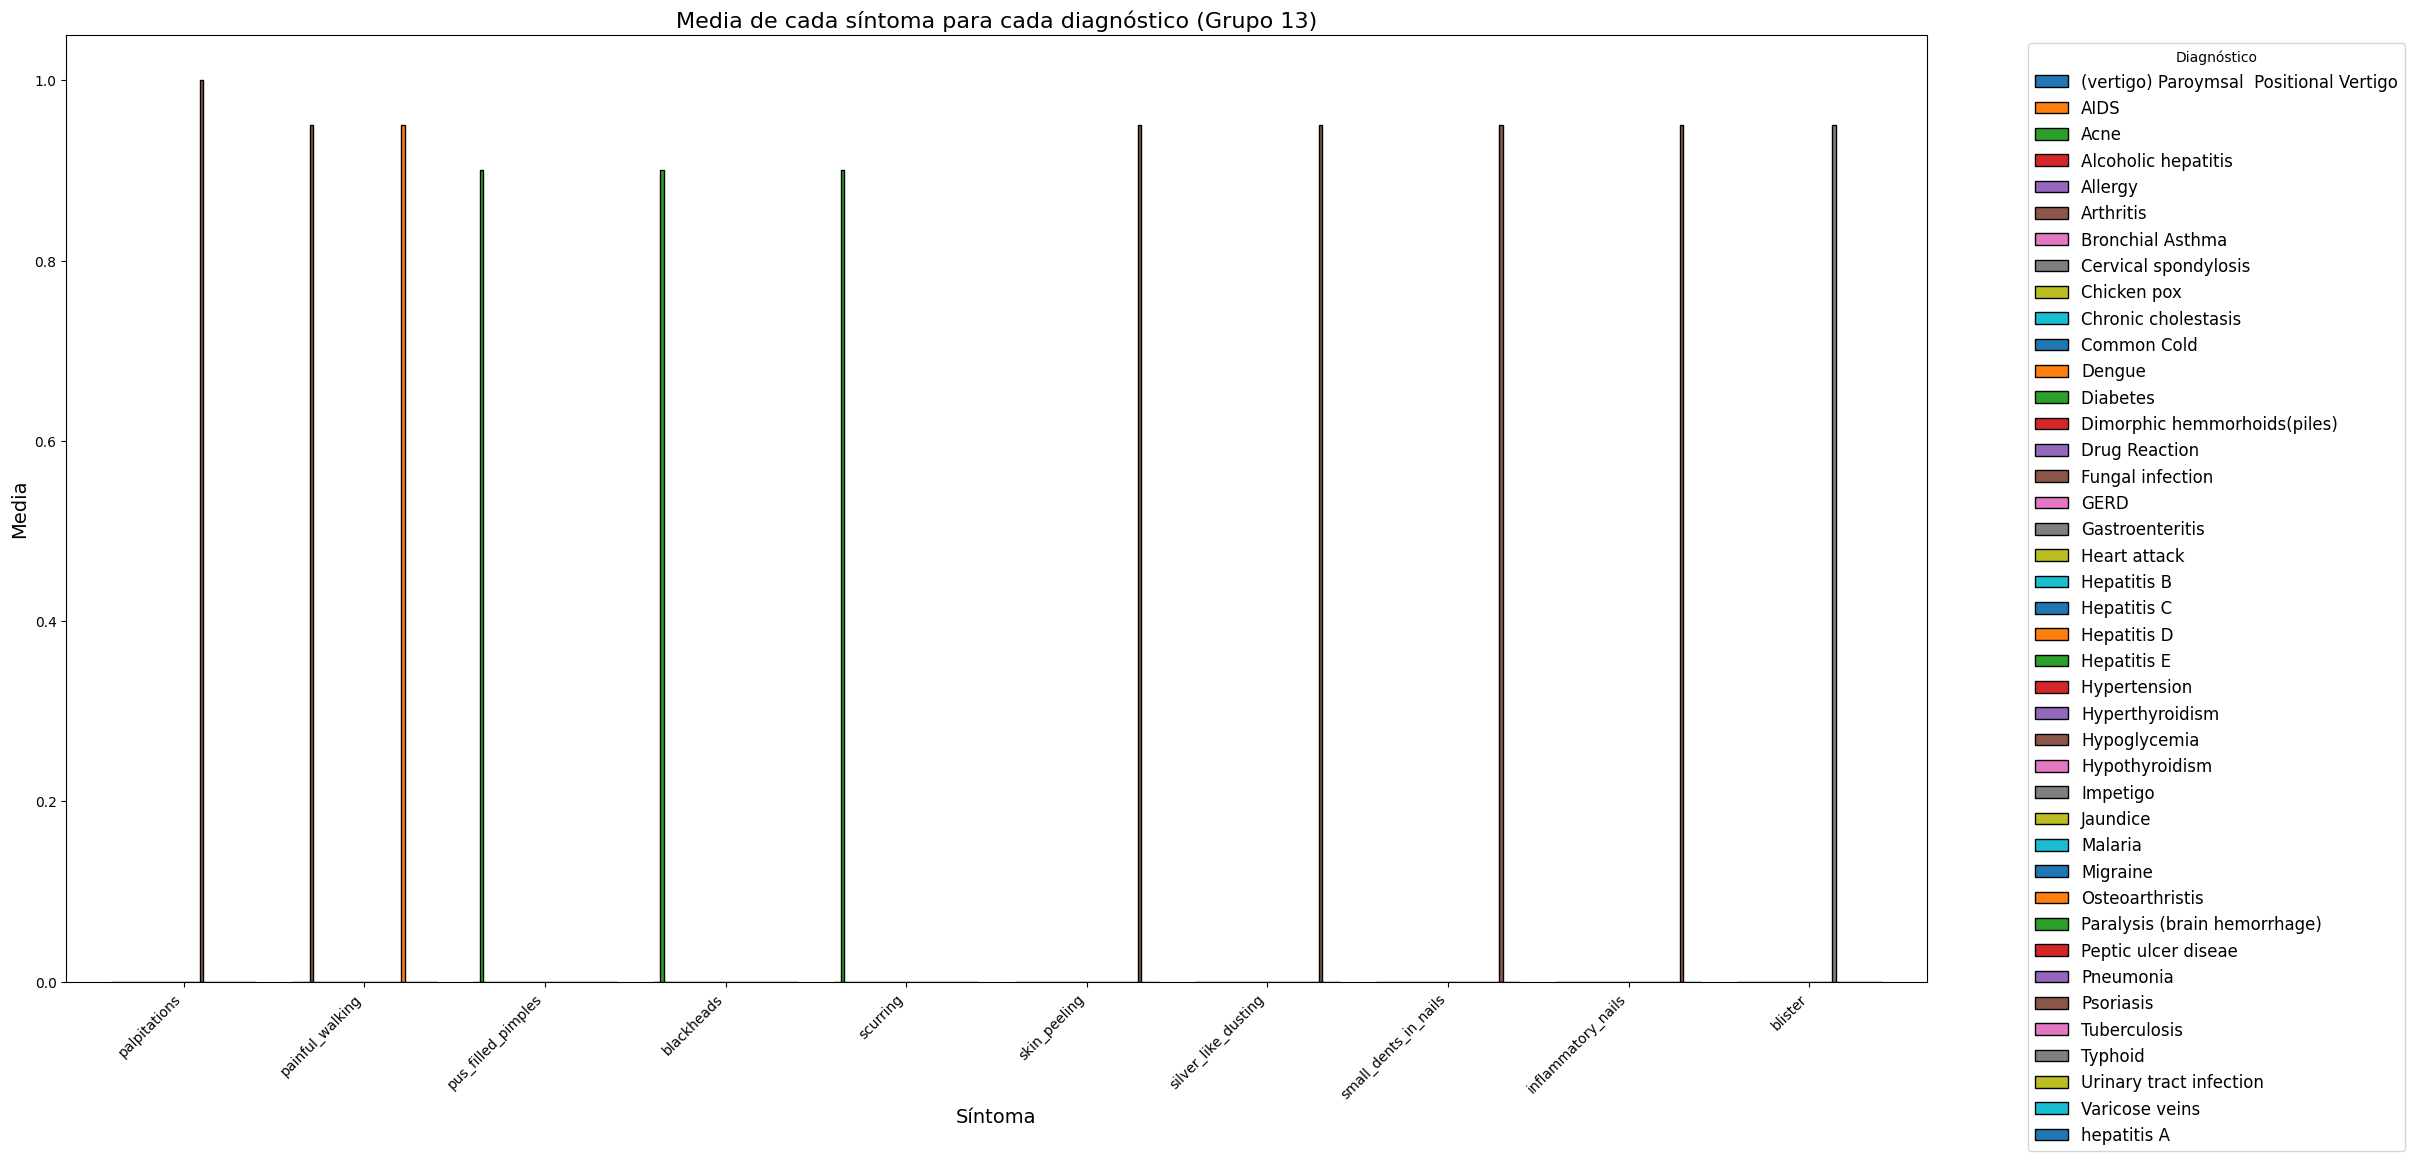

<Figure size 2000x1200 with 0 Axes>

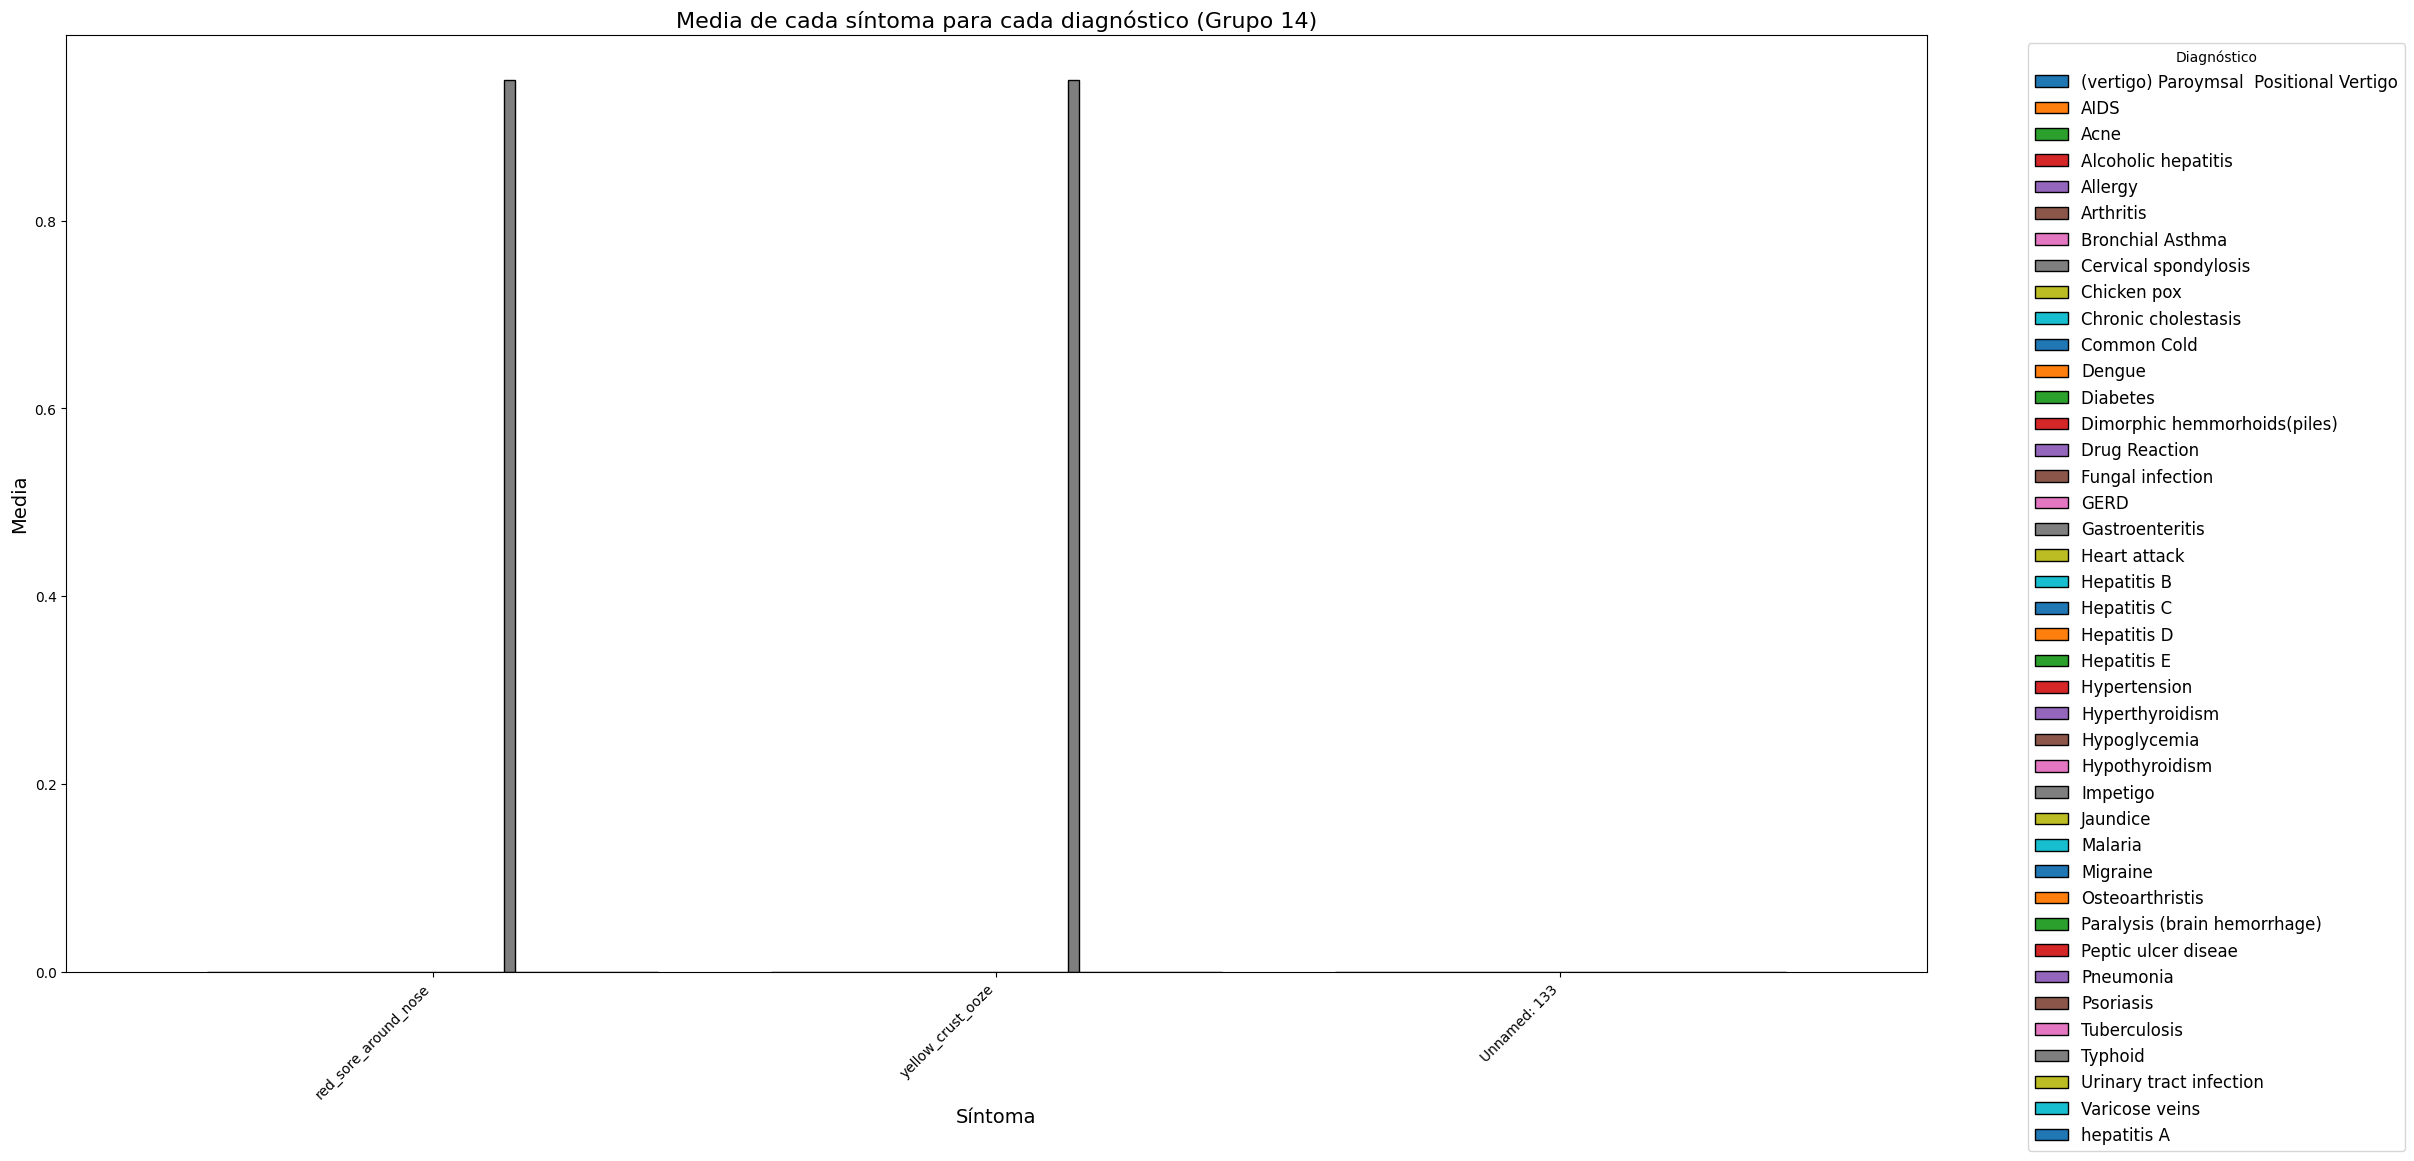

In [ ]:
### COMO SON MUCHOS SÍNTOMAS SE AGRUPARON PARA PODER VISUALIZARLOS MEJOR
symptom_chunks = [diagnosis_means.iloc[i:i+10, :] for i in range(0, len(diagnosis_means), 10)]

for i, chunk in enumerate(symptom_chunks):
    plt.figure(figsize=(20, 12))
    chunk.plot(kind='bar', edgecolor='black', figsize=(20, 12), width=0.8)
    plt.xlabel('Síntoma', fontsize=14)
    plt.ylabel('Media', fontsize=14)
    plt.title(f'Media de cada síntoma para cada diagnóstico (Grupo {i+1})', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.tight_layout(pad=3.0)
    plt.legend(title='Diagnóstico', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
    plt.show()


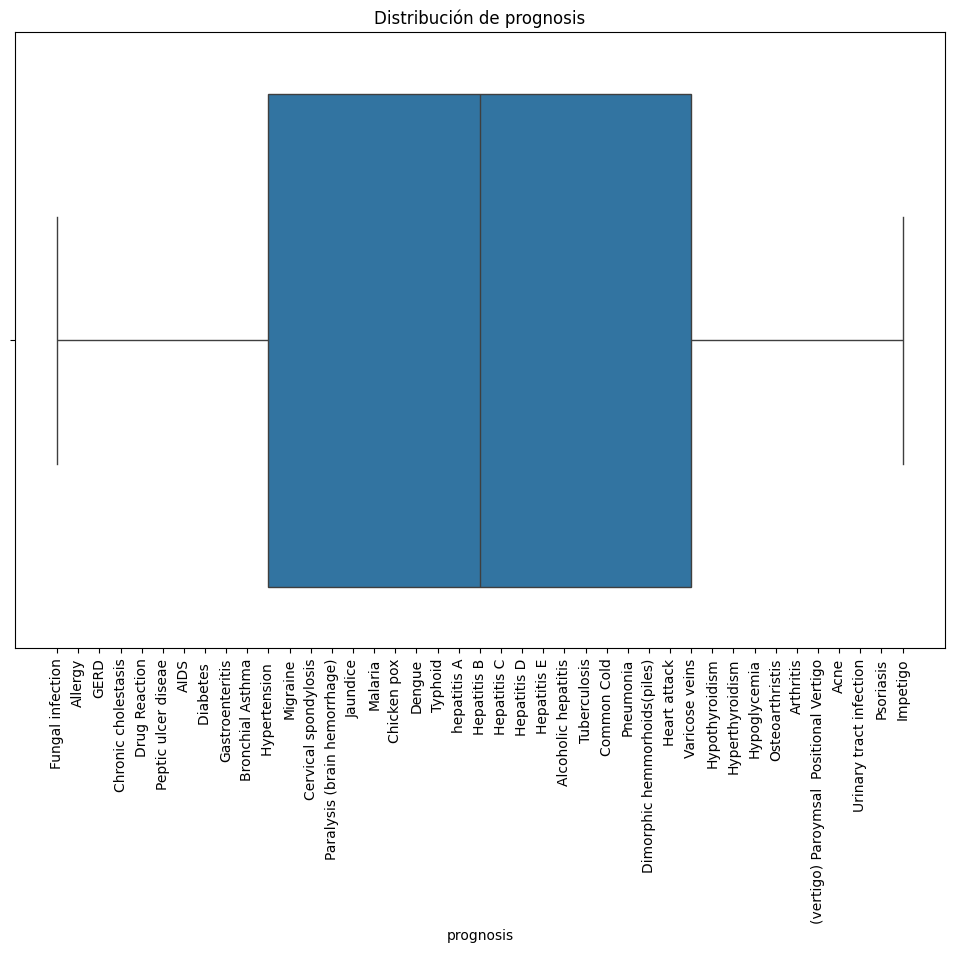

In [ ]:
### CREAR UNA FIGURA MÁS GRANDE PARA QUE QUEPAN MEJOR LAS ETIQUETAS
plt.figure(figsize=(12, 8))

### CREAR EL BOXPLOT USANDO SEABORN
sns.boxplot(x=df['prognosis'])

### ROTAR LAS ETIQUETAS DEL EJE X PARA QUE NO SE AMONTONEN
plt.xticks(rotation=90)

### AGREGAR TÍTULO AL GRÁFICO USANDO MATPLOTLIB
plt.title('Distribución de prognosis')

###MOSTRAR EL GRÁFICO
plt.show()

<Figure size 1200x800 with 0 Axes>

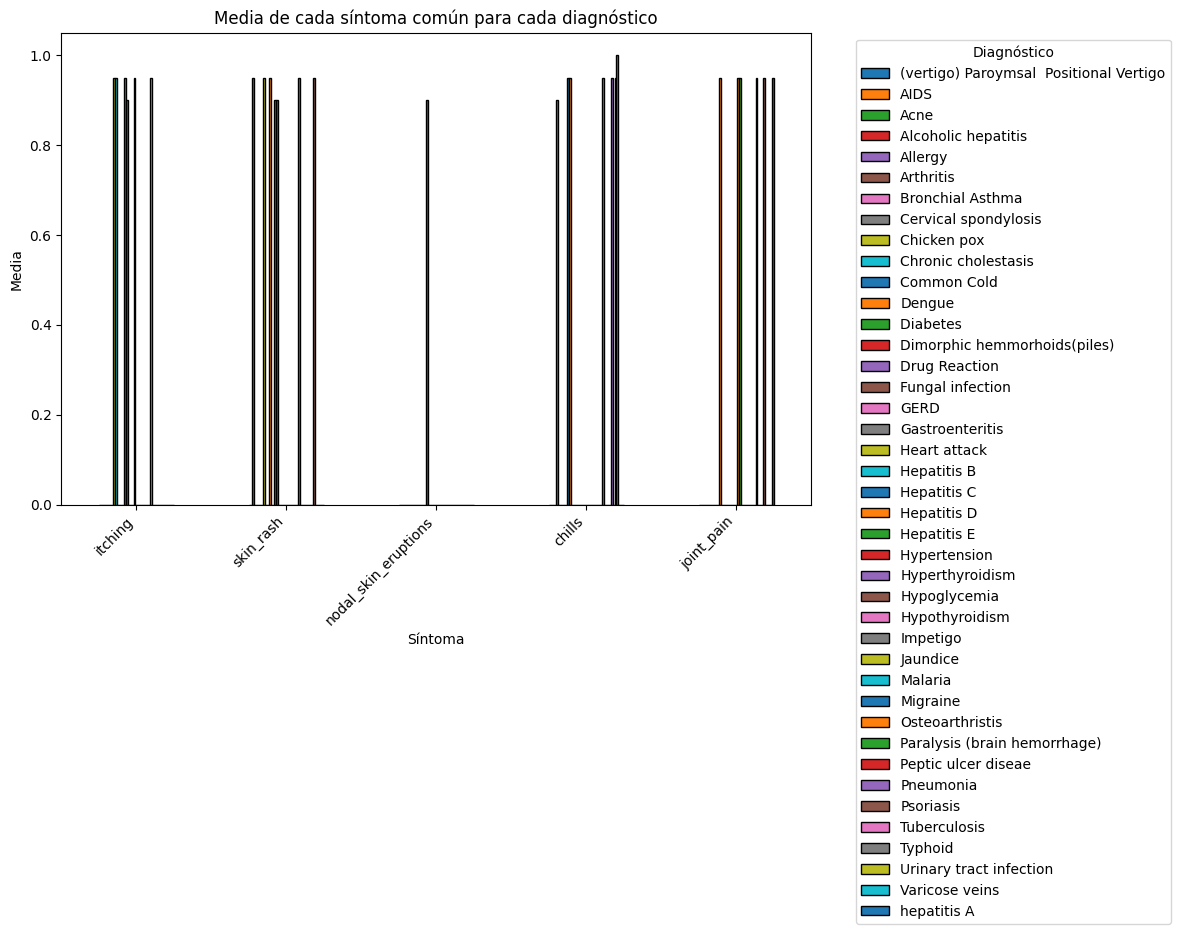

In [ ]:
### IDENTIFICAR SÍNTOMAS COMUNES
sintomas_comunes = ['itching', 'skin_rash', 'nodal_skin_eruptions', 'chills', 'joint_pain']

df_sintomas_comunes = df[sintomas_comunes + ['prognosis']]

### AGRUPAR POR DIAGNÓSTICO Y CALCULAR ESTADÍSTICAS DESCRIPTIVAS
diagnosis_grouped = df_sintomas_comunes.groupby('prognosis').mean()

### TRANSPONER EL DATAFRAME PARA QUE LOS DIAGNÓSTICOS ESTÉN EN EL ÍNDICE Y LOS SÍNTOMAS EN LAS COLUMNAS
diagnosis_means = diagnosis_grouped.T

# GRAFICAR LA MEDIA DE CADA SÍNTOMA COMÚN PARA CADA DIAGNÓSTICO
plt.figure(figsize=(12, 8))
diagnosis_means.plot(kind='bar', edgecolor='black', figsize=(12, 8))
plt.xlabel('Síntoma')
plt.ylabel('Media')
plt.title('Media de cada síntoma común para cada diagnóstico')
plt.legend(title='Diagnóstico', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


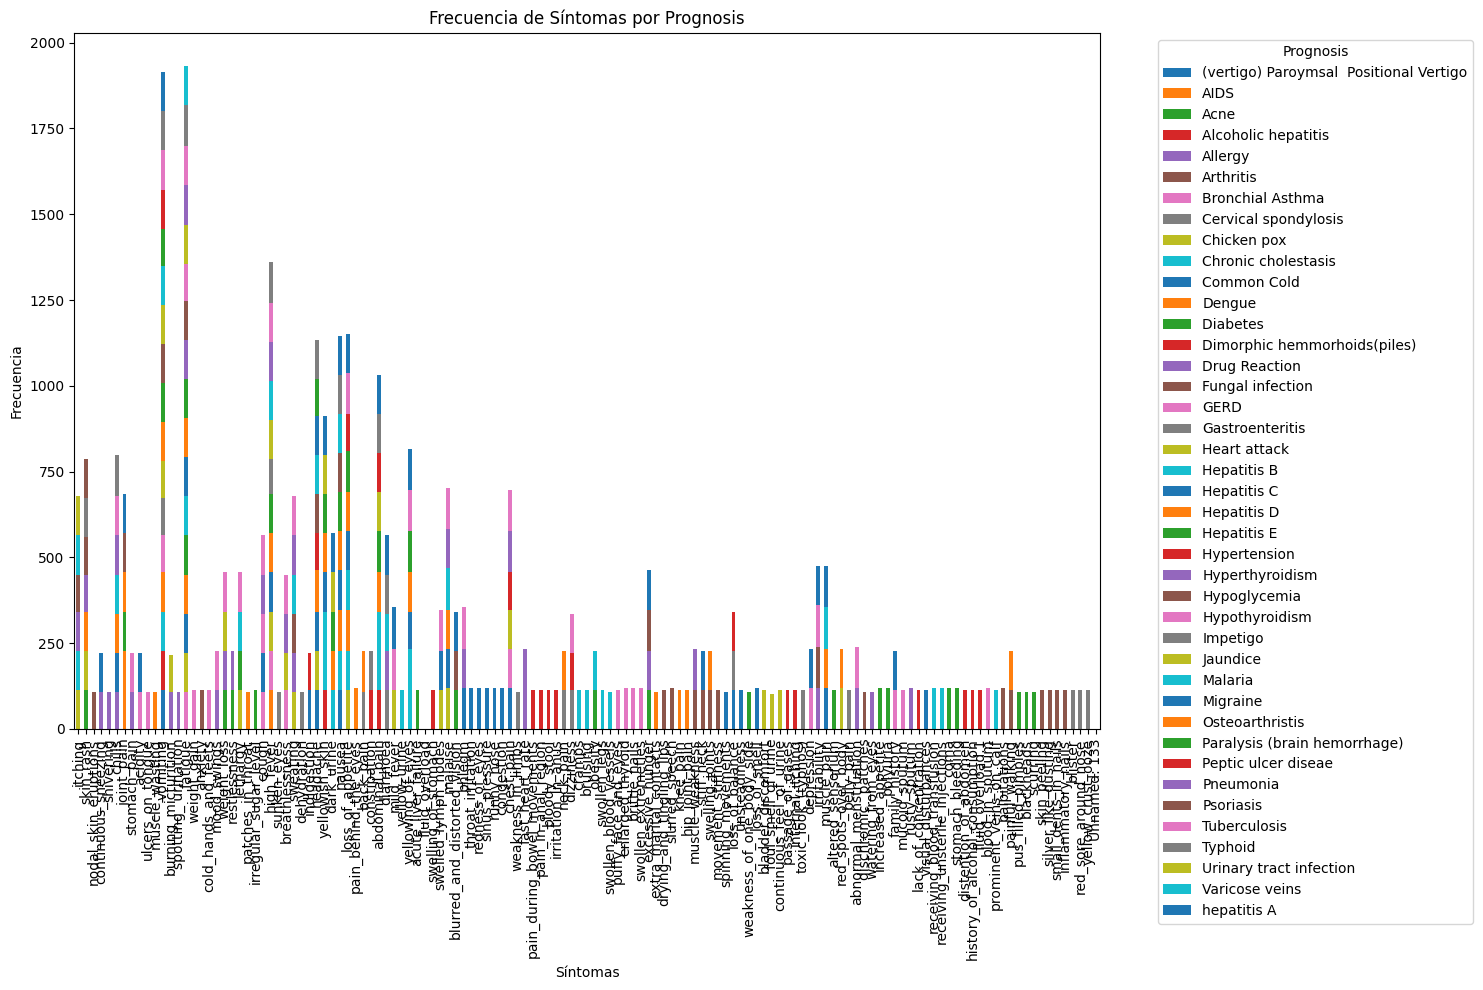

In [ ]:
### ACÁ ADEMÁS DE VER LA FRECUENCIA DE LOS SÍNTOMAS , SE LOS PUEDE ASOCIAR A SU DIAGNÓSTICO

grouped_df = df.groupby('prognosis').sum()

### TRANSPONEMOS EL DATAFRAME PARA FACILITAR EL GRAFICADO
transposed_df = grouped_df.T

### CREAR EL GRÁFICO DE COLUMNAS APILADAS
transposed_df.plot(kind='bar', stacked=True, figsize=(15, 10))

### AÑADIMOS TÍTULO Y ETIQUETAS
plt.title('Frecuencia de Síntomas por Prognosis')
plt.xlabel('Síntomas')
plt.ylabel('Frecuencia')
plt.legend(title='Prognosis', bbox_to_anchor=(1.05, 1), loc='upper left')

### MOSTRAMOS EL GRÁFICO
plt.tight_layout()
plt.show()

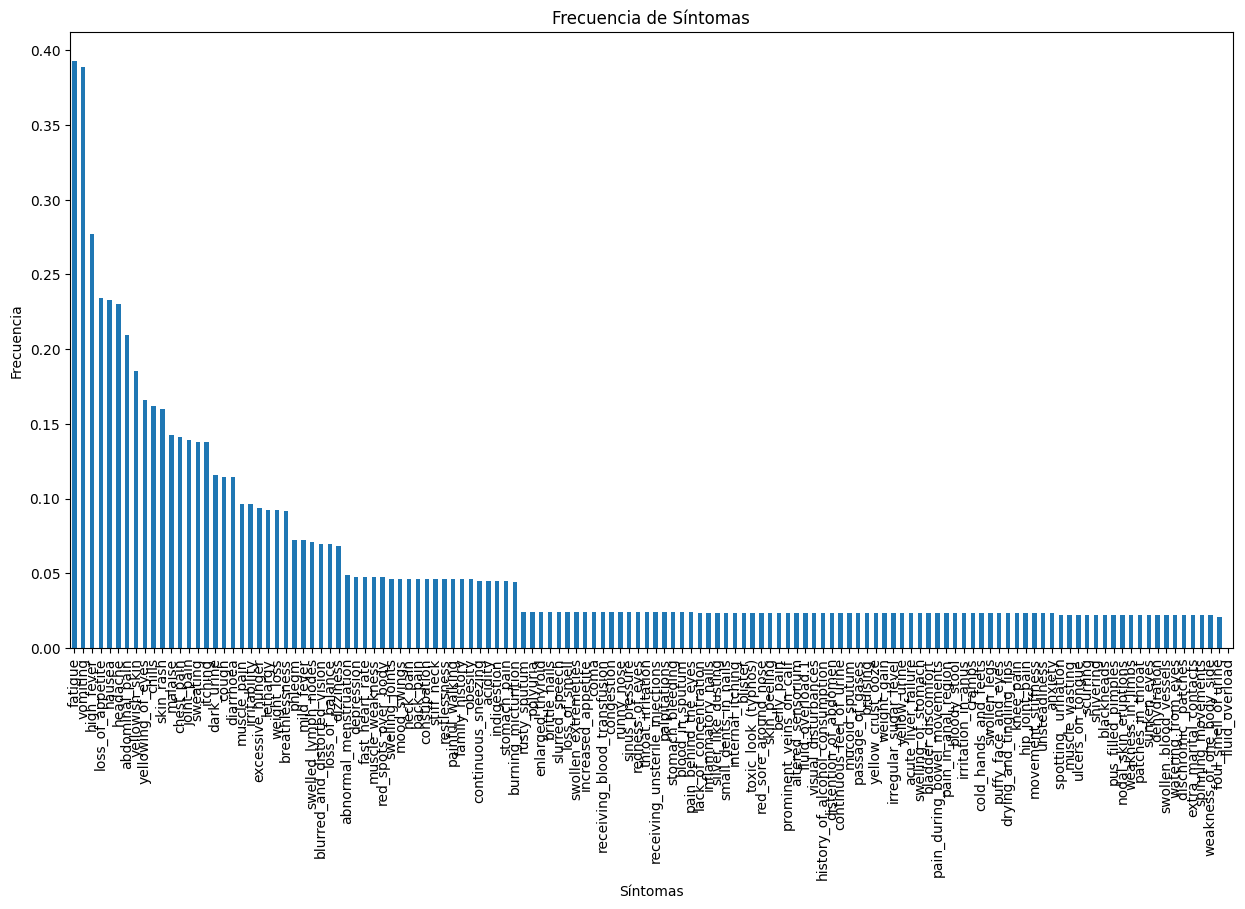

In [ ]:
### EXCLUIR LA COLUMNA 'PROGNOSIS' Y CUALQUIER OTRA COLUMNA NO NUMÉRICA, OTRA FORMA DE VER LA FRECUENCIA DE SÍNTOMAS
df_numeric = df.drop(columns=['prognosis', 'Unnamed: 133'], errors='ignore')

### SUMAR EL NÚMERO DE VECES QUE CADA SÍNTOMA ESTÁ PRESENTE
frecuencia_sintomas = df_numeric.mean().sort_values(ascending=False)

### GRÁFICO DE BARRAS PARA LA FRECUENCIA DE CADA SÍNTOMA
plt.figure(figsize=(15, 8))
frecuencia_sintomas.plot(kind='bar')
plt.title('Frecuencia de Síntomas')
plt.xlabel('Síntomas')
plt.ylabel('Frecuencia')
plt.show()

# MACHINE LEARNING

La matriz de confusión muestra que no hay errores de clasificación.
Cada diagnóstico fue predicho correctamente en todos los casos. Por ejemplo:
Para (vertigo) Paroymsal Positional Vertigo, hubo 18 casos y todos fueron predichos correctamente (18, 0, 0, ..., 0).
Para AIDS, hubo 30 casos y todos fueron predichos correctamente (0, 30, 0, ..., 0).

El modelo tiene una exactitud perfecta en el conjunto de prueba, lo que significa que clasifica correctamente cada diagnóstico basado en los síntomas. Esto puede indicar un modelo extremadamente preciso, pero también puede sugerir sobreajuste si el conjunto de datos es pequeño o no suficientemente variado. Es importante evaluar el modelo con datos nuevos y no vistos para confirmar su generalización.

In [ ]:
### MACHINE LEARNING PARA PREDECIR CON PRECISIÓN LA ENFERMEDAD EN BASE A LOS SÍNTOMAS

### DIVIDIR LOS DATOS EN CONJUNTOS DE ENTRENAMIENTO Y PRUEBA
X = df.drop(columns=['prognosis', 'Unnamed: 133'])  # ELIMINAR COLUMNAS DE DIAGNÓSTICO Y SIN NOMBRE
y = df['prognosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### CREAR Y ENTRENAR EL MODELO DE ÁRBOL DE DECISIÓN
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

### REALIZAR PREDICCIONES EN EL CONJUNTO DE PRUEBA
y_pred = model.predict(X_test)

### EVALUAR EL MODELO
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo:", accuracy)

### IMPRIMIR EL INFORME DE CLASIFICACIÓN Y LA MATRIZ DE CONFUSIÓN
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))

print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))


Exactitud del modelo: 1.0

Informe de clasificación:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        15
                            Common Cold       1.00     